## Загрузка и изучение данных

Импортируем все необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

Прочитаем файл датасета и создадим новый датафрейм на основе его данных, выведем первые 15 строк и основную информацию о созданном датафрейме

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://.../datasets/games.csv') #часть ссылки скрыта ввиду NDA
display(data.head(15))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Созданный датафрейм:**
- состоит из 16715 строк
- названия колонок не приведены к "змеиному" регистру
- в некоторых столбцах присутствуют пропущенные значения
- колонки с годом выпуска и оценкой пользователя имеют неправильный тип данных

## Предобработка данных

### Переименование столбцов

Приведем наименования столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()

Проверяем правильность замены наименований столбцов

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Наименования столбцов приведены к нижнему регистру**

### Удаление пропусков

Находим пропуски во всех столбцах датафрейма

In [6]:
data.isna().sum().sort_values(ascending = False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Проверим пустые значения в столбцах `name` и `genre` 

In [7]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Ни  названия игры, ни  жанра нет в одних и тех же строках, посмотрим другие игры платформы `GEN`

In [8]:
data.query('platform == "GEN"').sort_values(by = 'na_sales', ascending = False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
1453,Mortal Kombat 3,GEN,1994.0,Fighting,1.03,0.27,0.00,0.04,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN


Эти строки все равно не будут входить в актуальный исследуемый период, поэтому удалим их

Проверяем кол-во строк в датафрейме до удаления

In [9]:
data.shape[0]

16715

Удаляем пустые строки в столбце `genre`, в этих же двух строках пустые значения в столбце `name`

In [10]:
data = data.dropna(subset = ['name']).reset_index(drop = True)

Проверяем кол-во строк в датафрейме после удаления

In [11]:
data.shape[0]

16713

Проверяем пропущенные значения в столбце `year_of_release`

In [17]:
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пока не заменили все пропуски в столбце `year_of_release`, интересно проверить - пропуски в оценках связаны с более ранними годами, когда еще не было системы оценивания от пользователей или нет

In [18]:
data.query('year_of_release > 2000').isna().sum().sort_values(ascending = False)

critic_score       6376
rating             4605
user_score         4532
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Связь между ранним годом выпуска и отсутствием оценок пользователей и критиков не подтвердилась.

Удаляем строки с пропусками в столбце `year_of_release`

Проверяем кол-во строк до удаления

In [21]:
data.shape[0]

16713

Удаляем пустые строки и обновляем индексы

In [22]:
data = data.dropna(subset = ['year_of_release']).reset_index(drop=True)

Проверяем кол-во строк до удаления

In [23]:
data.shape[0]

16444

Следующим шагом нужно определиться с пропусками в столбцах с оценкой пользователя и критиков, так как эти пропуски не зависят от значений в других столбцах, то их сложно объективно заменить на какие-то средние значения. Если заменить пустое значение на медианные значения для игр на такой же приставке и в таком же жанре, то тем самым можно исказить результаты, так как игры одного жанра и на одной приставке могут существенно разниться в оценках. Поэтому лучше заменить на техническое значение, например, -1 , и эти данные не стоит учитывать при построении графиков в дальнейшем.

Меняем пропущенные значения в столбцах `user_score` и `critic_score` на -1

In [27]:
for t in ['user_score','critic_score']:
    data[t] = data[t].fillna(value=-1)


Пропуски в столбце `rating` с категориальными переменными можно заменить на значение `unknown` 

In [28]:
data['rating'] = data['rating'].fillna(value='unknown')

Смотрим общую информацию о пропусках в датафрейме после произведенных замен

In [29]:
data.isna().sum().sort_values(ascending = False)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**В датафрейме были обнаружены следующие пропущенные значение:**
    
- в столбцах `name`, `genre` и `year_of_release`, строки с пропусками удалены
- в столбце `rating`, заменены на `unknown`
- в столбцах `user_score` и `critic_score`, заменены на -1, при построении графиков эти значения учитывать не будем

### Обработка аномальных значений

Проверим значения в столбцах `year_of_release`,`critic_score`,`na_sales`,`eu_sales`,`jp_sales`,`other_sales`

In [30]:
for c in ['year_of_release','critic_score','na_sales','eu_sales','jp_sales','other_sales']:
    print (f'Значения столбца: {c}')
    print(data[c].value_counts())
    print ('Минимальное значение столбца:',data[c].min())
    print ('Максимальное значение столбца:', data[c].max())

Значения столбца: year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64
Минимальное значение столбца: 1980.0
Максимальное значение столбца: 2016.0
Значения столбца: critic_score
-1.0     8461
 70.0     252
 71.0     248
 75.0     240
 80.0     235
         ... 
 20.0       3
 29.0       3
 13.0       1
 17.0       1
 21.0       1
Name: critic_score, Length: 82, dtype: int64
Минимальное значение столбца: -1.0
Максимальное значение столбца: 98.0

Отдельно проверим значения в столбце `user_score`

In [31]:
data['user_score'].value_counts()

-1     6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
0.5       2
1.1       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

Значение `tbd` в столбце с оценкой пользователей говорит о том, что оценка еще не определена. Для того, чтобы в дальнейшем  исследованиии можно было строить диаграмму рассеивания и считать корреляцию, необходимо чтобы столбец `user_score` имел численный тип, поэтому значения `tbd` необходимо заменить на шаблонное численное значение, а при построении графиков не будем учитывать эти строки. Проверяем строку, в которой оценка пользователя стоит 0

In [32]:
data.query('user_score == "0"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2797,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,-1.0,0,E


Оценки критиков тоже нет, информативности при подсчете зависимостей нам эта строка не даст, меняем значения в столбце `user_score` на -1 для значения `tbd` и проверяем замену

In [33]:
data['user_score'] = data['user_score'].replace('tbd', -1)
data['user_score'].value_counts()

-1     8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.5       2
1.1       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Отсортируем для колонки `na_sales` значения по убыванию,  чтобы убедиться, что максимальное значения этой колонки - 41.36 млн. проданных копий не аномальное

In [34]:
data['na_sales'].sort_values(ascending = False)

0        41.36
1        29.08
9        26.93
5        23.20
2        15.68
         ...  
9092      0.00
12789     0.00
9093      0.00
9094      0.00
16443     0.00
Name: na_sales, Length: 16444, dtype: float64

Видимо, это один из бестселлеров

**При проверке аномальных значений в столбце `user_score` было обнаружено значение `tbd`, говорящее о том, что оценка еще не определена, поэтому значения в таких строках были заменены на шаблонное значение -1, и при построении графиков учитываться эти строки не будут**

### Изменение типов данных

Изменим тип данных в столбце `year_of_release` на целочисленный `int`, чтобы можно было удобно их обрабатывать при построении графики. На временной тип менять особого смыла нет, так как информация есть только о годе выпуска и при замене на временной тип добавляются ненужные месяц и день, а при попытке извлечь год из значения методом `dt.year` тип столбца снова меняется на `float`. Также изменим тип данных столбца `user_score`, чтобы в дальнейшем можно было считать зависимости и корреляцию со значениями данного столбца и проверим обновленные типы столбцов

In [35]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Проверим основную информацию

In [36]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unknown


Изменены следующие типы данных:
- тип данных столбца `year_of_release` на целочисленный `int`
- тип данных столбца `user_score` на численный `float`

### Удаление дубликатов

Проверим неявные дубликаты в столбцах `rating`,`platform`,`genre`

In [37]:
for c in ['rating','platform','genre']:
    print (f'Значения столбца: {c}')
    print(data[c].unique())

Значения столбца: rating
['E' 'unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
Значения столбца: platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Значения столбца: genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


Возрастная категория 'E' (для всех) первоначально имела название 'K-A' (kids to adults). Уберем неявный дубликат, оставив одно название этой возрастной категории - 'E'. Рейтинг 'RP' означает, что рейтинг еще не присвоен, поэтому заменим это значение на стандартное значение 'unknown' и не будем учитывать при изучении рейтингов в дальнейшем

Проверяем кол-во значений до замены

In [38]:
data['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

Меняем значения в столбце `rating`

In [39]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].replace('RP', 'unknown')

Проверяем, что заменились только нужные строки

In [40]:
data['rating'].value_counts()

unknown    6677
E          3924
T          2905
M          1536
E10+       1393
EC            8
AO            1
Name: rating, dtype: int64

Проверим явные дубликаты в датафрейме

In [41]:
data.duplicated().sum()

0

Дополнительно проверяем, что в датафрейме нет неявных дубликатов одних и тех же игр. Для этого проверим на неявные дубликаты три столбца сразу - `name`, `platform` и `year_of_release`

In [42]:
data[['name','platform','year_of_release']].duplicated().sum()

1

Обнаружен 1 неявный дубликат. Проверим какую строку нужно именно из двух удалить

In [44]:
data[['name','platform','year_of_release']].value_counts().head(5)

name                        platform  year_of_release
Madden NFL 13               PS3       2012               2
 Beyblade Burst             3DS       2016               1
Ratatouille                 PC        2007               1
Rapala Tournament Fishing!  X360      2006               1
Rapala Trophies             PSP       2006               1
dtype: int64

Отфильтровываем таблицу только для этих двух строк

In [45]:
data.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Вторая строка по порядку как раз менее полезна, ее и удалим. Проверяем кол-во строк до удаления

In [46]:
data.shape[0]

16444

Удаляем вторую по порядку строку с дубликатом и обновляем индексы

In [47]:
data = data.drop_duplicates(subset=['name','platform','year_of_release'], keep = 'first').reset_index(drop = True)

Проверяем кол-во строк после удаления и повторно проверяем на неявные дубликаты

In [48]:
data.shape[0]

16443

In [49]:
data[['name','platform','year_of_release']].duplicated().sum()

0

Дополнительно проверим на неявные дубликаты эти столбцы, приведя все значения в них к нижнему регистру. Чтобы не менять значения в исходном датафрейме, создадим новый датафрейм `data_str_lower`, присвоив ему значения из датафрейма `data`. Для того,что бы изменения, вносимые в новый датафрейм, не касались основного датиафрейма воспользуемся методом `copy()`.

In [50]:
data_str_lower = data.copy()
data_str_lower['name'] = data_str_lower['name'].str.lower()
data_str_lower['platform'] = data_str_lower['platform'].str.lower()

Проверяем на наличие дубликатов значений в приведенных к нижнему регистру столбцах нового датафрейма

In [51]:
data_str_lower[['name','platform','year_of_release']].duplicated().sum()

0

**Удалены неявные дубликаты в столбце `rating` и удалены неявные дубликаты при проверке игр одного года и на одной платформе**

### Добавление новых столбцов

Добавим столбец с суммарными продажами во всех регионах в отдельный столбец `all_sales`

In [52]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

Проверим обновленную таблицу

In [54]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unknown,28.31


В датафрейм добавлен столбец `all_sales` с суммарными продажами по всем регионам

**На этапе предобработки данных были выполнены следующие действия:**

- столбцы переименованы и приведены к "змеиному" регистру
- обнаруженные пропуски в столбцах:
    - `name`, `genre` и `year_of_release`, строки с пропусками удалены
    - `rating`, заменены на `unknown`
    - `user_score` и `critic_score`, заменены на -1, при построении графиков эти значения учитывать не будем
- изменены типы данных в столбцах:
    - `year_of_release` на целочисленный `int`
    - `user_score` на численный `float` 
- аномальные значения в столбце `users_score` изменены на шаблонное значение
- в датафрейм добавлен столбец `all_sales` с суммарными продажами по всем регионам
- удалены неявные дубликаты из столбца `rating`, удалены неявные дубликаты игр одной платформы с одним годом выпуска, датафрейм проверен на наличие явных дубликатов

## Исследовательский анализ данных

### Количество выпущенных игр в разные года

Строим столбчатую диаграмму, показывающую как из года в год менялось кол-во выпущенных игр

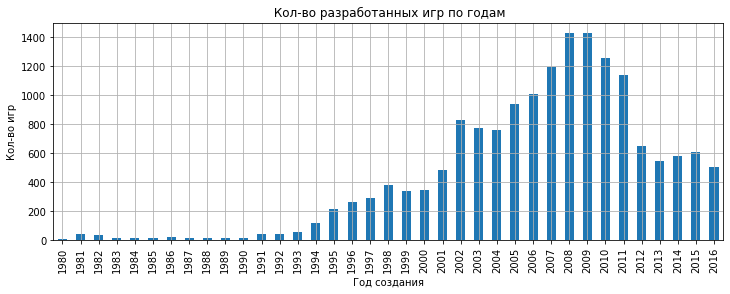

In [55]:
data.query('year_of_release > 0').pivot_table(index = 'year_of_release', values = 'name', aggfunc = {'count'}).\
            plot(kind = 'bar', title = ' Кол-во разработанных игр по годам', xlabel = 'Год создания',\
                                              ylabel = 'Кол-во игр', grid = True, legend = False, figsize = (12,4))
plt.show()

**По диаграмме видно, что до 1995 года игр выпускалось очень мало, этот временной период можно не рассматривать в дальнейшем. Больше всего игр выпускалось в 2008 - 2009 годах**

### Распределение продаж популярных платформ

Найдем перечень всех игровых платформ

In [56]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Построим распределение суммарного кол-ва продаж всех игровых платформ по годам

<function matplotlib.pyplot.show(close=None, block=None)>

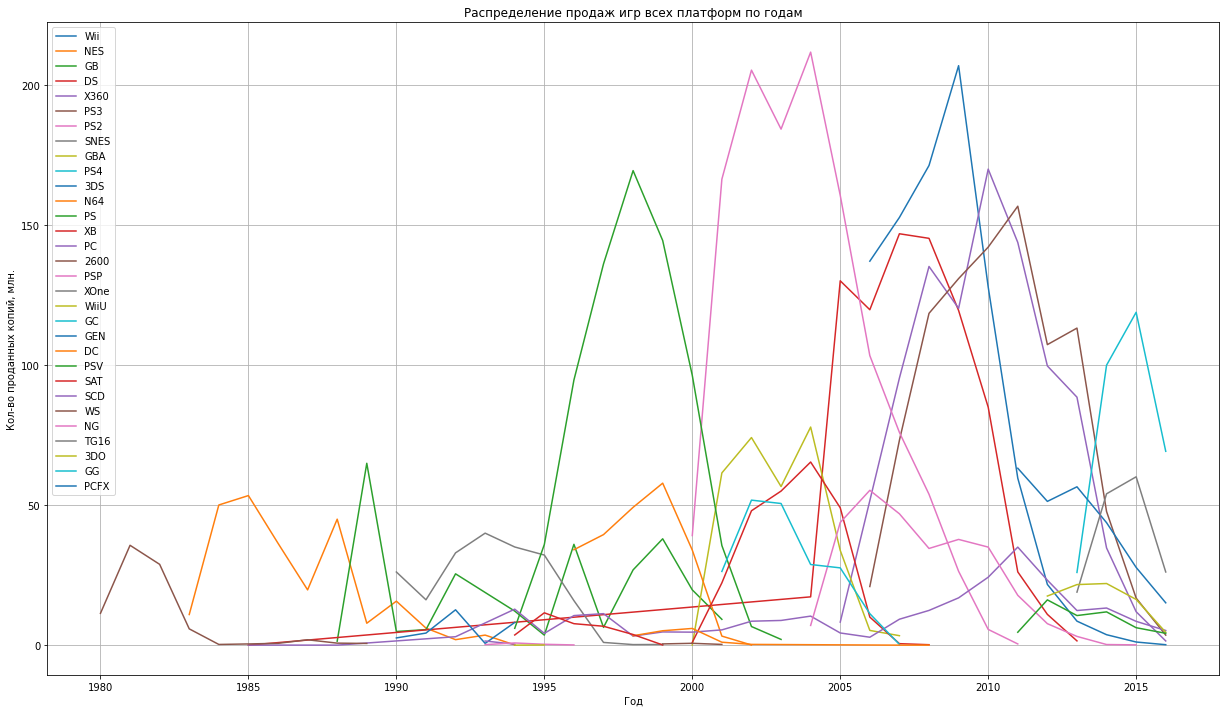

In [57]:
#пришлось продублировать код для ax в начале, так как нужно, чтобы первоначальные данные для осей в цикле были уже сохранены в ax
# создаем график для первого по порядку ([0]) элемента списка платформ с самыми высокими продажами и записываем эти значения в переменную ax
ax = data.loc[(data['year_of_release'] > 0) & (data['platform'] == data['platform'].unique()[0])].\
    pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc={'sum'}).reset_index(drop=False).\
    plot(x = 'year_of_release', y = 'sum', legend = True, grid = True, label = data['platform'].unique()[0],figsize = (21,12))
#создаем цикл для прохождения списка самых продаваемых платформ, начиная со второго элемента ([1]),
#так как с помощью первого уже был создан первоначальный график, и каждый раз перезаписываем данные для построения графиков в
#аргумент ax, тем самым на каждой итерации цикла добавляя данные на график
for d in data['platform'].unique()[1:]:
    ax = data.loc[(data['year_of_release'] > 0) & (data['platform'] == d)].\
    pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc={'sum'}).reset_index(drop=False).\
    plot(x = 'year_of_release', y = 'sum', legend = True, grid = True, label = d,figsize = (21,12), ax = ax)
plt.xlabel('Год')
plt.ylabel('Кол-во проданных копий, млн.')
plt.title('Распределение продаж игр всех платформ по годам')
plt.show  

На одном графике не очень наглядно все видно, построим еще график для каждой платформы отдельно


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


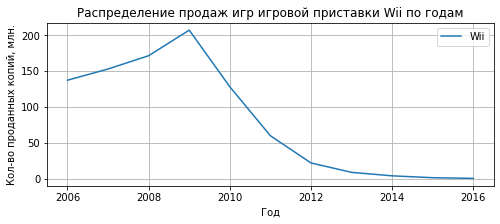

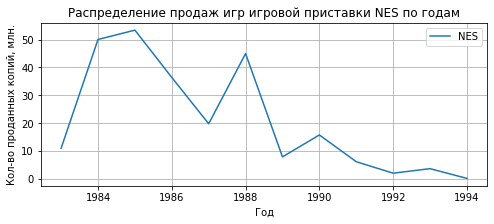

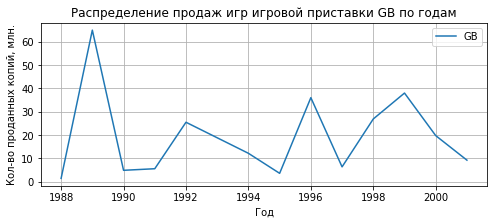

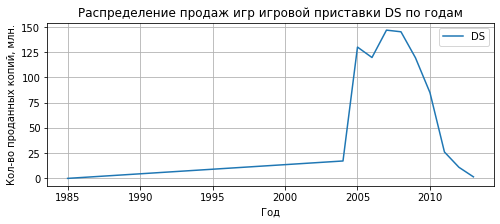

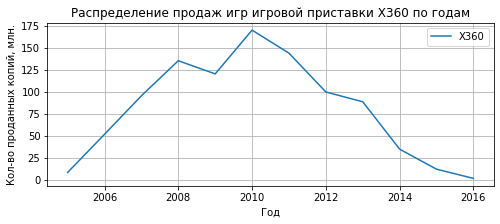

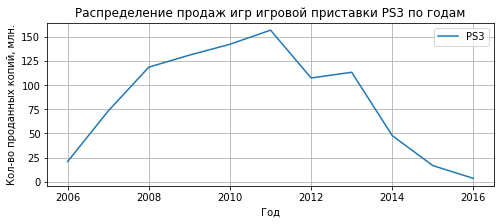

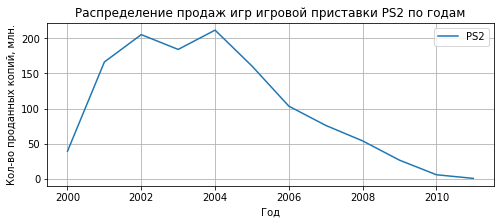

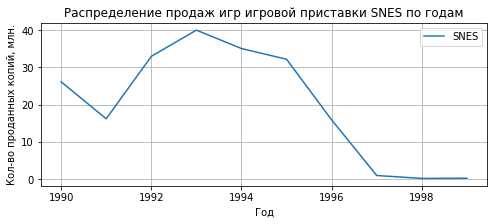

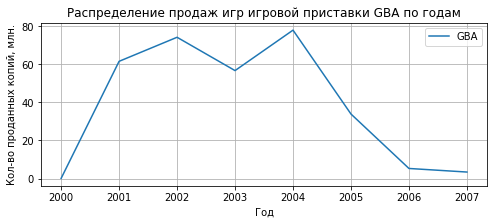

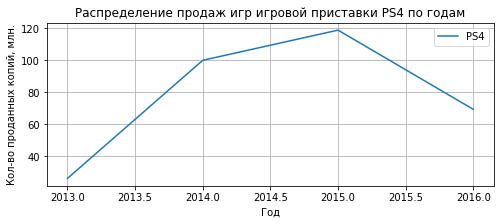

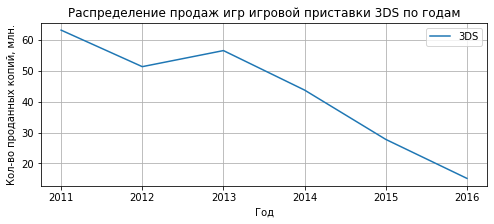

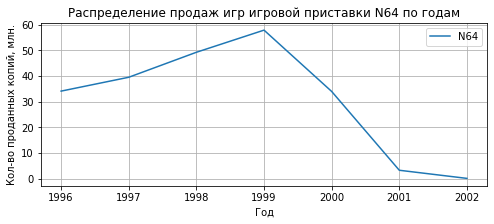

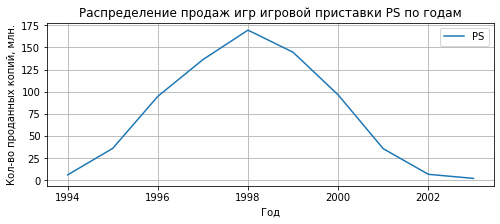

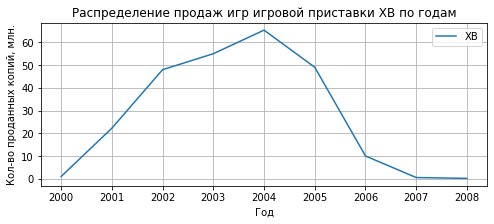

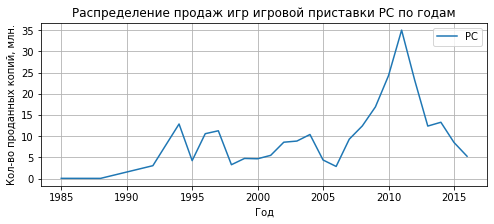

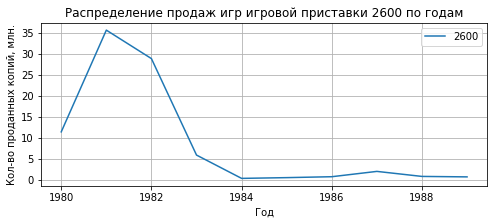

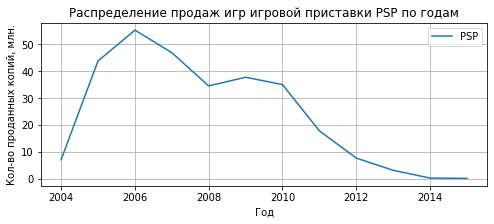

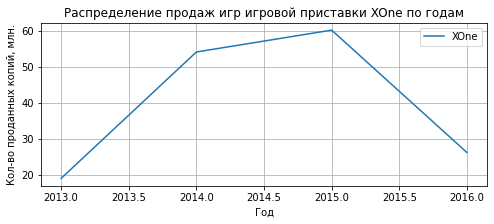

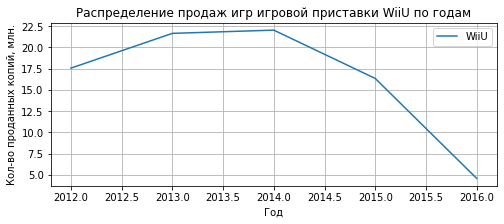

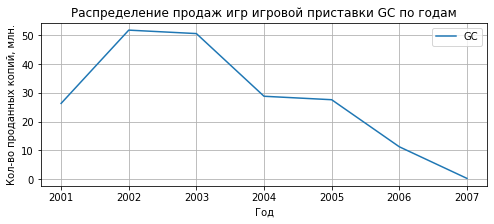

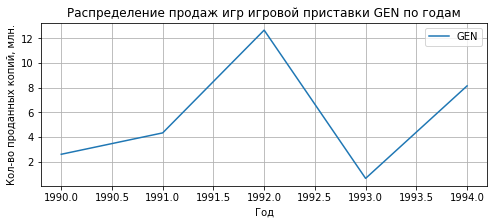

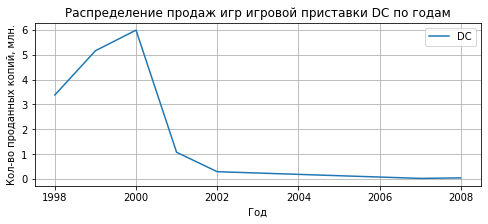

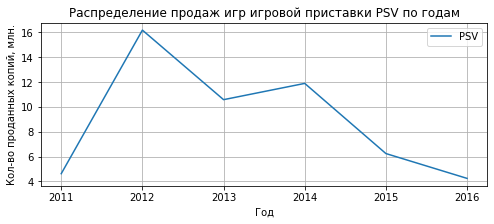

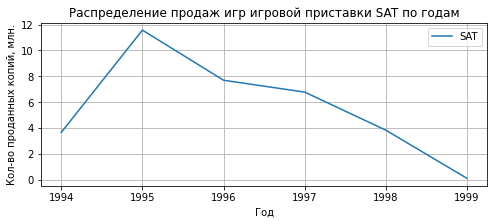

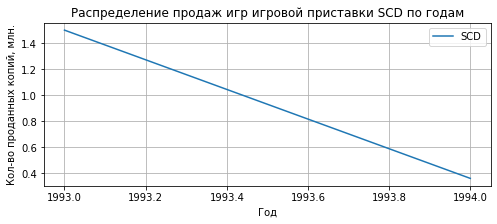

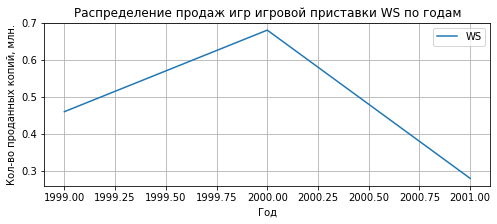

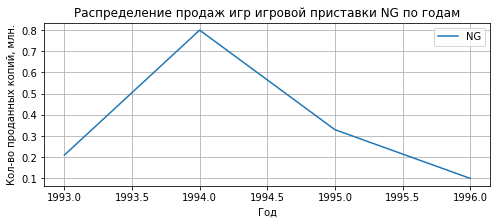

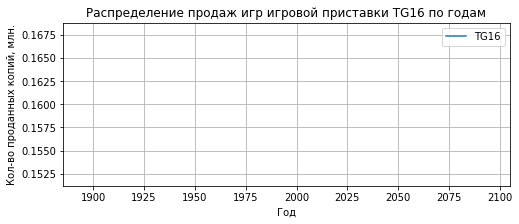

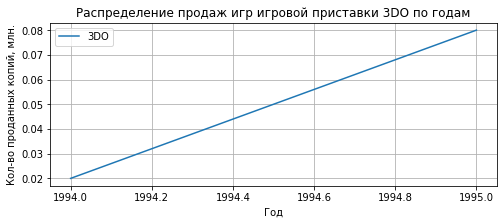

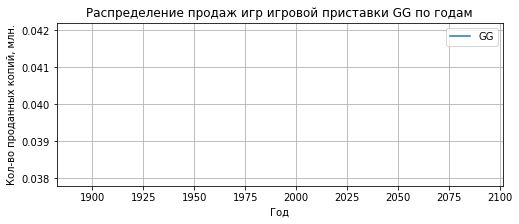

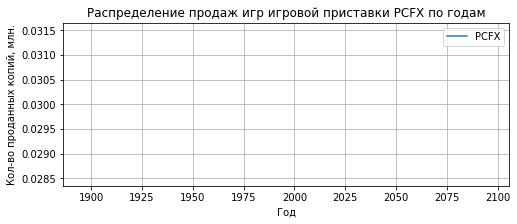

In [58]:
for d in data['platform'].unique():
    data.loc[(data['year_of_release'] > 0) & (data['platform'] == d)].\
    pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc={'sum'}).reset_index(drop=False).\
    plot(x = 'year_of_release', y = 'sum', legend = True, grid = True, label = d,figsize = (8,3))
    plt.xlabel('Год')
    plt.ylabel('Кол-во проданных копий, млн.')
    plt.title(f'Распределение продаж игр игровой приставки {d} по годам')
    plt.show  

Каждый график полезен для изучения во временном интервале, но для большей наглядности в общем кол-ва продаж по платформам построим столбчатую диаграмму для всех платформ с кол-вом проданных игр

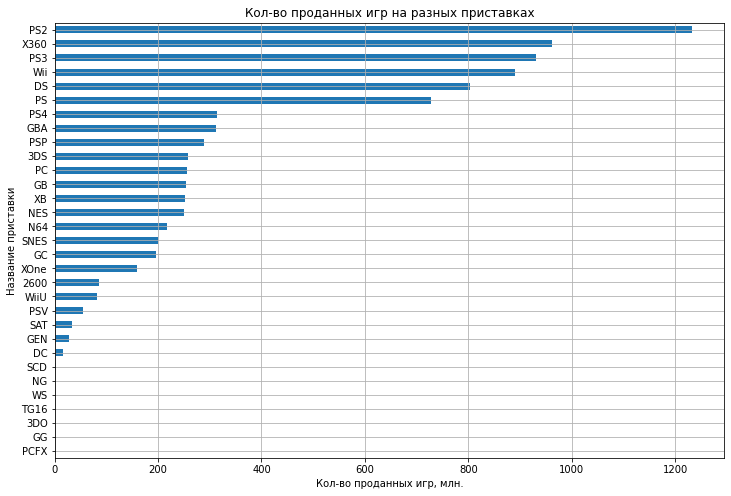

In [59]:
top_sales = data.pivot_table(index = 'platform',values = 'all_sales',\
            aggfunc={'sum'}).sort_values(by='sum',ascending = True)
top_sales.plot(kind = 'barh', title = 'Кол-во проданных игр на разных приставках',\
                                            grid = True, legend = False, figsize = (12,8))
plt.xlabel('Кол-во проданных игр, млн.')
plt.ylabel('Название приставки')
plt.show()

По диаграмме видно 6 лидеров по продажам игр: PS2, X360, Wii, PS3, DS, PS. Эти же данные были получены при построении графиков для каждой платформы отдельно. Построим для этих самых продаваемых платформ сравнительное распределение общих продаж по годам

Создадим список из 6 самых популярных платформ по кол-ву продаж

In [60]:
top_sales.sort_values(by = 'sum', ascending = False)[:6].index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

Используя этот список, постоим распределение продаж по годам для этих 6 самых популярных платформ

<function matplotlib.pyplot.show(close=None, block=None)>

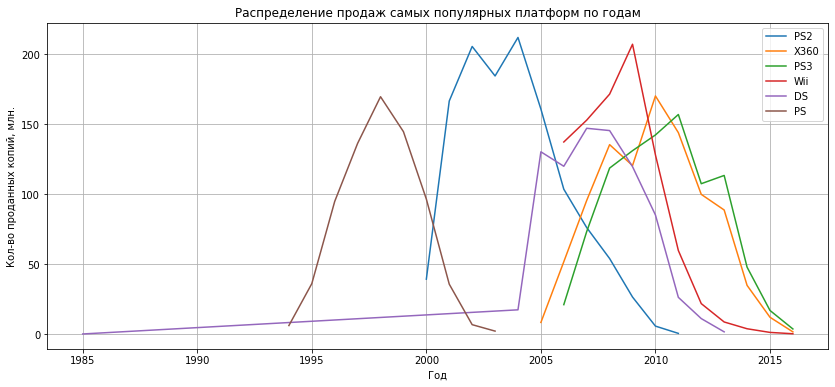

In [61]:
#пришлось продублировать код для ay в начале, так как нужно, чтобы первоначальные данные для осей в цикле были уже сохранены в ay
# создаем график для первого по порядку ([0]) элемента списка платформ с самыми высокими продажами и записываем эти значения в переменную ay
ax = data.loc[(data['year_of_release'] > 0) & (data['platform'] == top_sales.sort_values(by = 'sum', ascending = False)[:6].index[0])].\
    pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc={'sum'}).reset_index(drop=False).\
    plot(x = 'year_of_release', y = 'sum',legend = True, grid = True,\
         label = top_sales.sort_values(by = 'sum', ascending = False)[:6].index[0],figsize = (14,6))
#создаем цикл для прохождения списка самых продаваемых платформ, начиная со второго элемента ([1]),
#так как с помощью первого уже был создан первоначальный график, и каждый раз перезаписываем данные для построения графиков в
#аргумент ax, тем самым на каждой итерации цикла добавляя данные на график
for d in top_sales.sort_values(by = 'sum', ascending = False)[:6].index[1:]:
    ax = data.loc[(data['year_of_release'] > 0) & (data['platform'] == d)].\
    pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc={'sum'}).reset_index(drop=False).\
    plot(x = 'year_of_release', y = 'sum', legend = True, grid = True, label = d,figsize = (14,6), ax = ax)
plt.xlabel('Год')
plt.ylabel('Кол-во проданных копий, млн.')
plt.title('Распределение продаж самых популярных платформ по годам')
plt.show

Результаты графика для платформ с самыми большими продажами за все время показали среднее время жизни приставки 8-10 лет

Попробуем расчитать примерно среднее время жизни для всех игровых платформ, а не только для самых популярных. Гистрограмму строить не будем, так как у нас присутствуют и совсем молодые платформы, которые еще несколько лет могут продаваться и будут искажать результаты в графике, поэтому найдем медианное значение времени жизни для всех игровых платформ.  Для этого создадим новый датафрейм и для каждой платформы вычтем из самого позднего года, когда была выпущена игра на такой платформе, самый ранний год, и для этого набора значений найдем медианное значение

In [62]:
#создадим сводную таблицу из основного датафрейма, сгруппируем по платформам, значения для агррегации возьмем из столбца 
#с датой и применим агррегатные функции max() и min() для нахождения самого последнего и самого первого годов выпуска, 
#вычтем эти значения, записав их в новый cтолбец и посчитаем для этого нового столбца медиану и среднее
data_mean_year_of_platforms = data.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = {'max','min'}).reset_index()
data_mean_year_of_platforms['mean_years'] =  data_mean_year_of_platforms['max'] - data_mean_year_of_platforms['min']
print('Медианное время жизни платформы:', data_mean_year_of_platforms['mean_years'].median(), \
      'среднее:', round(data_mean_year_of_platforms['mean_years'].mean(),2))

Медианное время жизни платформы: 6.0 среднее: 7.61


**Полученные результаты показали, что:**
- лидеры по продажам игр за все время - PS2, X360, Wii, PS3, DS, PS
- полученный график для лидеров продаж показал примерное время жизни этих платформ в 8-10 лет, расчеты же продаж для всех платформ показали, что жизненный цикл приставки составлет примерно 6 лет.
- для приставки Nintendo DS есть некорректные значения в датах выпущенных игр, так как она была создана в 2004 году и игр раньше этого срока быть не могло для этой приставки

### Поиск потенциально прибыльных платформ

Для дальнейшего анализа создадим таблицу с данными актуального периода в 3 года (2014-2016, половина расчитанного медианного значения примерного времени жизни приставки), взятие большего временного периода может привести к тому, что в него попадут игровые приставки, продажи по которым находятся в стагнации или уже пошли на спад, а сами приставки становятся не актуальными. Период в 3 года позволит выделить приставки, которые в 2017 году будт находиться в периоде финального роста или выйдут на плато

In [64]:
data_actual = data.query('year_of_release > 2013')
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16431,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16435,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01


Построим распределение по продажам для всех платформ для периода времени 2014-2016 годов

<function matplotlib.pyplot.show(close=None, block=None)>

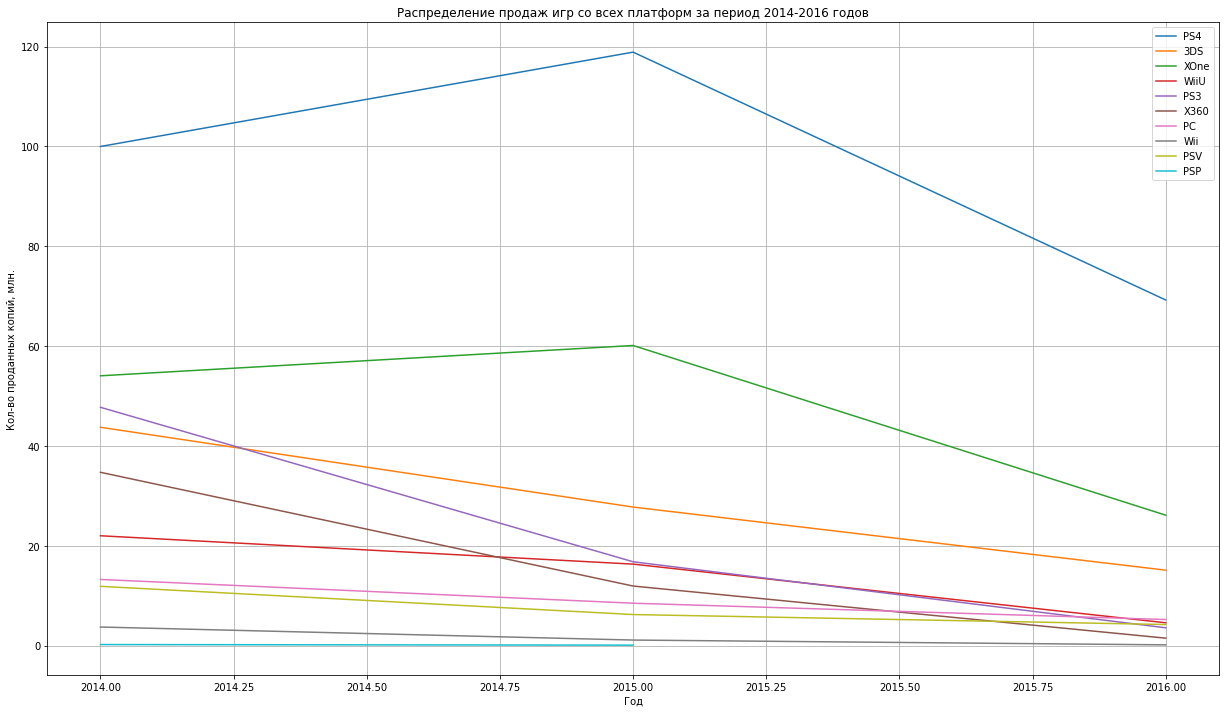

In [65]:
#пришлось продублировать код для ax в начале, так как нужно, чтобы первоначальные данные для осей в цикле были уже сохранены в ax
# создаем график для первого по порядку ([0]) элемента списка платформ с самыми высокими продажами и записываем эти значения в переменную ax
ax = data_actual.loc[data_actual['platform'] == data_actual['platform'].unique()[0]].\
    pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc={'sum'}).reset_index(drop=False).\
    plot(x = 'year_of_release', y = 'sum', legend = True, grid = True, label = data_actual['platform'].unique()[0],figsize = (21,12))
#создаем цикл для прохождения списка самых продаваемых платформ, начиная со второго элемента ([1]),
#так как с помощью первого уже был создан первоначальный график, и каждый раз перезаписываем данные для построения графиков в
#аргумент ax, тем самым на каждой итерации цикла добавляя данные на график
for d in data_actual['platform'].unique()[1:]:
    ax = data_actual.loc[data_actual['platform'] == d].\
    pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc={'sum'}).reset_index(drop=False).\
    plot(x = 'year_of_release', y = 'sum', legend = True, grid = True, label = d,figsize = (21,12), ax = ax)
plt.xlabel('Год')
plt.ylabel('Кол-во проданных копий, млн.')
plt.title('Распределение продаж игр со всех платформ за период 2014-2016 годов')
plt.show  

По общему графику тенденция отрицательная, у всех приставок продажи падают, на фоне остальных большее кол-во продаж показывают: PS4, XOne, 3DS. Для уточнения результата построим дополнительно графики для каждой консоли отдельно.

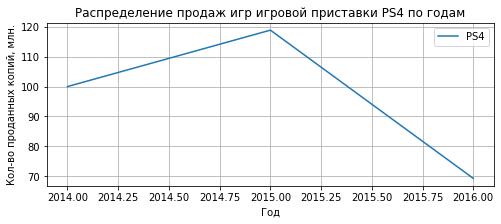

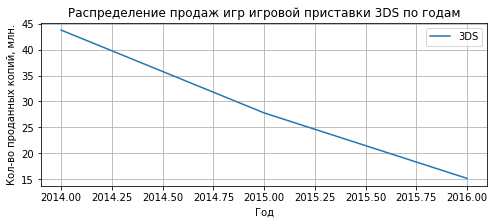

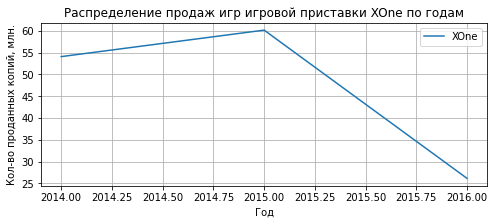

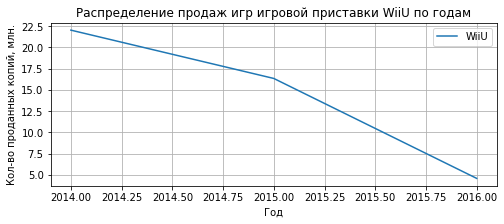

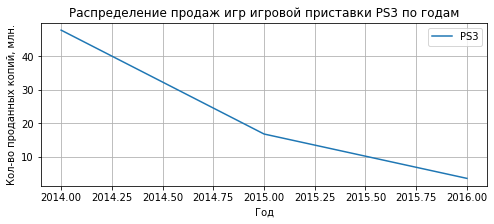

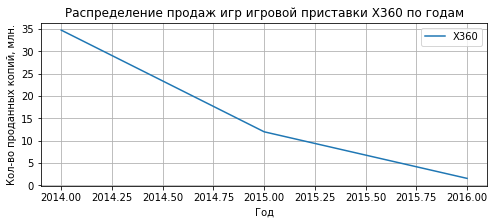

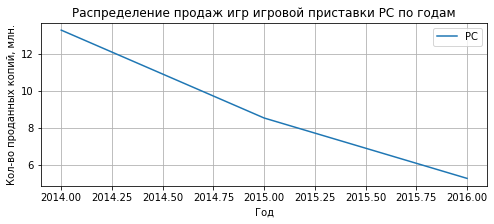

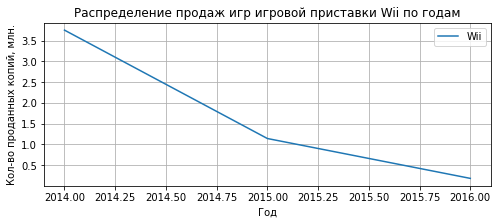

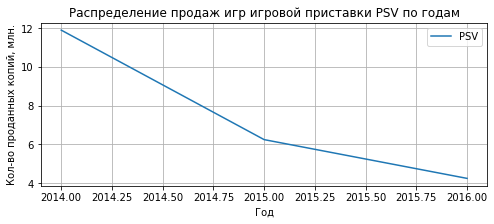

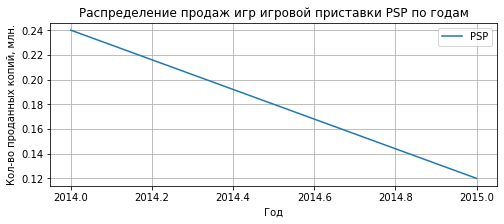

In [66]:
for d in data_actual['platform'].unique():
    data_actual.loc[data['platform'] == d].\
    pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc={'sum'}).reset_index(drop=False).\
    plot(x = 'year_of_release', y = 'sum', legend = True, grid = True, label = d,figsize = (8,3))
    plt.xlabel('Год')
    plt.ylabel('Кол-во проданных копий, млн.')
    plt.title(f'Распределение продаж игр игровой приставки {d} по годам')
    plt.show  

**Графики для каждой платформы подтвердили результат общего графика:**
- тенденция кол-ва продаж у приставок отрицательная, у всех приставок продажи падают
- на фоне остальных большее кол-во продаж показывают: PS4, XOne, 3DS
- молодых приставок с интересной тенденцией для роста намного меньше, чем это было раньше, когда приставки были очень популярны, и они выпускались одна за другой версией. Не считая относительно молодых XOne и PS4, хоть приставка WiiU и довольно молодая (создана в 2012 году), но продаж намного меньше, чем у более старой 3DS и тенденция по годам тоже отрицательная в кол-ве продаж
- для дальнейшего исследования выбран актуальный период с 2014 по 2016 год (последние 3 года), что соответсвует половине примерно посчитанного периода жизни платформы. Так как рынок динамичный, то направленность пользователей из года в год меняется и более долгий промежуток времени исказит результаты, тем более в 2008-2009 году было выпущено самое большое кол-во игр в год за все время, и эти игры также уже могут быть не актуальны для настоящих пользователей.

### Построение диаграммы размаха по продажам игр

Построим диаграмму размаха по суммарным продажам игр с разбивкой по всем платформам актуального периода 2014-2016 годов

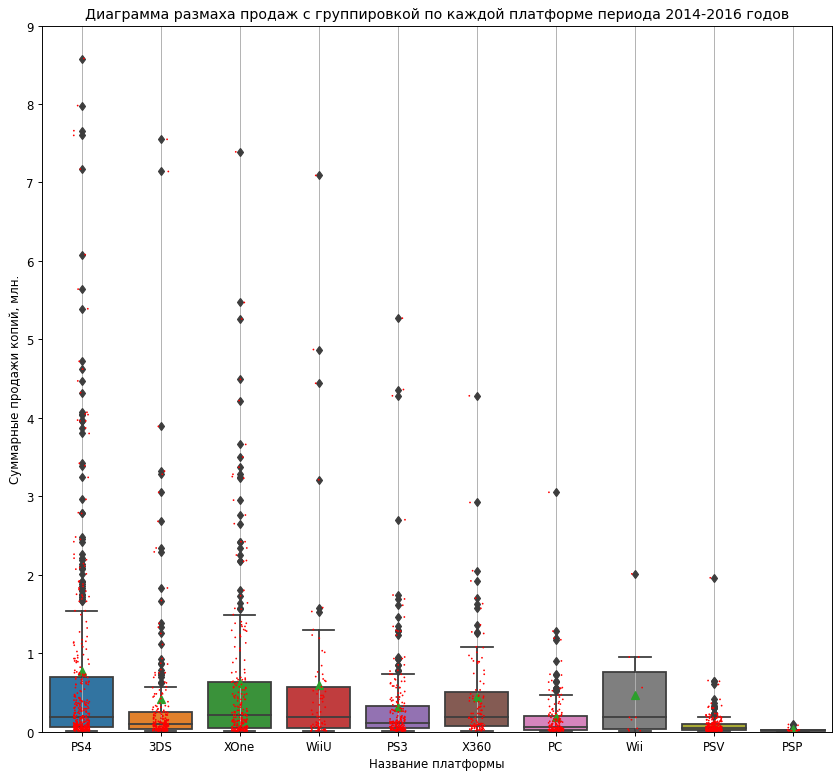

In [71]:
#задаем размеры и масштаб графика
plt.figure(figsize = (12,11), dpi =85)
#передаем методу boxplot значения столбцов для построения их на осях x и y и дополнительно отображаем среднее значение
sns.boxplot(x = 'platform', y = 'all_sales', showmeans = True, data = data_actual)
#покажем на графике кол-во значений в каждой группе для лучшего понимания результатов, задаем цвет, размер и расположение точек
#на графиках решил отобразить кол-во элементов точечно, с красивым отображанием чисел на таком графике до конца не разобрался 
sns.stripplot(x = 'platform', y = 'all_sales', data=data_actual, color='red', size=1.5, jitter=1)
#оформляем график и подписываем оси
plt.grid(True, axis = 'x')
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи копий, млн.')
#ограничим выбросы больше 9, чтобы можно было лучше рассмотреть график
plt.ylim(0,9)
plt.title('Диаграмма размаха продаж с группировкой по каждой платформе периода 2014-2016 годов')
plt.show()

Выведем для информации кол-во игр у каждой платформы

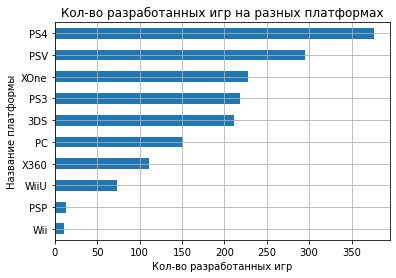

In [72]:
data_actual['platform'].value_counts(ascending = True).plot(kind = 'barh', grid = True)
plt.title('Кол-во разработанных игр на разных платформах')
plt.xlabel('Кол-во разработанных игр')
plt.ylabel('Название платформы')
plt.show()

**Диаграмма размаха с разбивкой по платформам позволила сделать следующие выводы:**
- в среднем кол-во продаж у одного из лидеров рынка - платформы PS4 меньше, чем у его основного конкурента - XOne, но игр на PS4 разработано больше, поэтому и игр, продающихся в аномально большом кол-ве тоже больше, чем у XOne.
- при сравнении более старых моделей двух основных конкурентов - PS3 и X360 видна та же тенденция: на платформе  PS3 опять разрабатывалось игр  намного больше, чем на X360, но у X360 опять как и медианное значение проданных копий игры выше, так и среднее.
- на третьего лидера по объему продаж на 2016 года - платформу 3DS разрабатывается не мало игр, но вот медианное значение намного ниже и , они продают много игр, но в меньшем объеме, чем основные конкуренты
- у приставки PSV большой объем продаваемых игр, как у лидеров рынка, но каждая игра продается в намного меньшем объеме
- у большинства игр наблюдается много значений - выбросов, значит некоторые игры продаются в очень большом объеме и становятся бестселлерами


### Влияние отзывов на продажи

#### Влияние оценок критиков на продажи игр популярной платформы

Для расчетов возьмем несколько популярных платформ по продажам. Сначала построим диаграмму рассеивания между отзывами критиков и продажами и посчитаем корреляцию

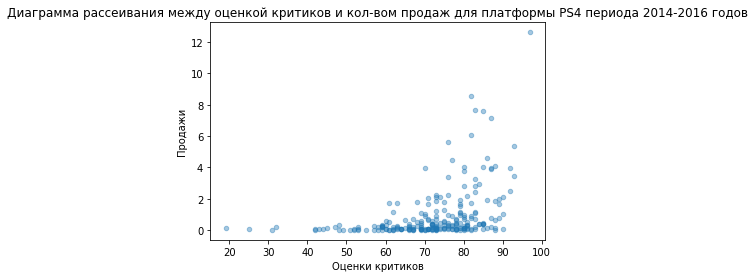

Корреляция между оценкой критиков и кол-вом продаж для платформы PS4 составляет0.40266141068104083


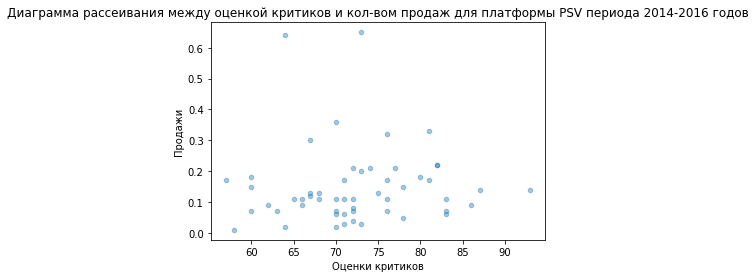

Корреляция между оценкой критиков и кол-вом продаж для платформы PSV составляет0.04266490657009526


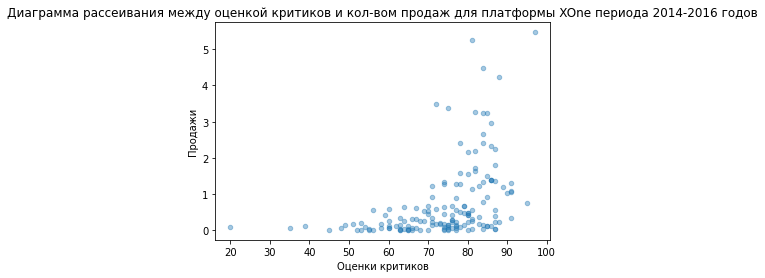

Корреляция между оценкой критиков и кол-вом продаж для платформы XOne составляет0.42867694370333226


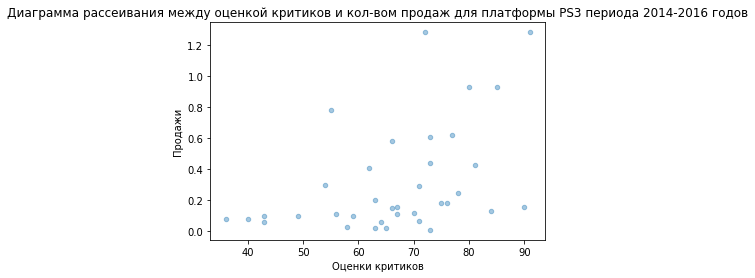

Корреляция между оценкой критиков и кол-вом продаж для платформы PS3 составляет0.44657460493190704


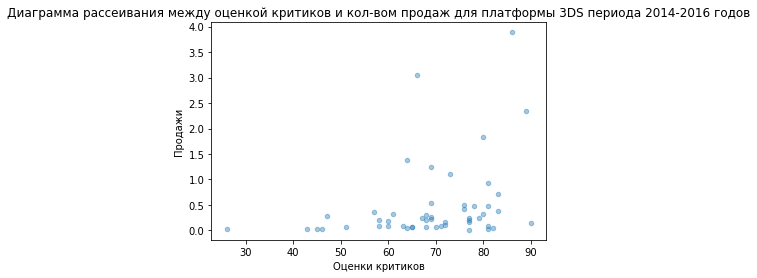

Корреляция между оценкой критиков и кол-вом продаж для платформы 3DS составляет0.314117492869051


In [74]:
#составляем цикл из 5 платформ актуального периода, в которых было больше всего разработанных игр 
for d in data_actual['platform'].value_counts(ascending = False).index[:5]:#unique()[:4]:
    data_actual.query('critic_score > 0 and platform == @d')\
        .plot(kind = 'scatter', x = 'critic_score', y = 'all_sales', figsize = (6,4), alpha = 0.4, \
              ylabel = 'Продажи', xlabel = 'Оценки критиков')
    plt.title(f'Диаграмма рассеивания между оценкой критиков и кол-вом продаж для платформы {d} периода 2014-2016 годов')
    plt.show()
    print(f"Корреляция между оценкой критиков и кол-вом продаж для платформы {d} составляет\
{data_actual.query('critic_score > 0 and platform == @d')['critic_score'].corr(data_actual.query('critic_score > 0 and platform == @d')['all_sales'])}")

**Между оценками критиков и суммарными продажами присутствует прямая зависимость, но не явно выраженная**

#### Влияние оценок пользователей на продажи игр популярной платформы

Популярные платформы для игр остаются те же. Теперь строим диаграммы рассеивания и считаем корреляцию между отзывами пользователей и продажами

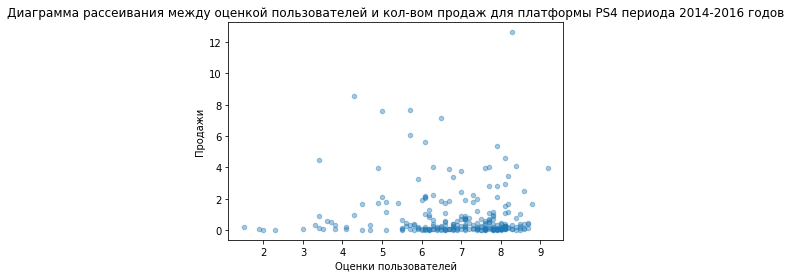

Корреляция между оценкой пользователей и кол-вом продаж для платформы PS4 составляет -0.040131589472697356


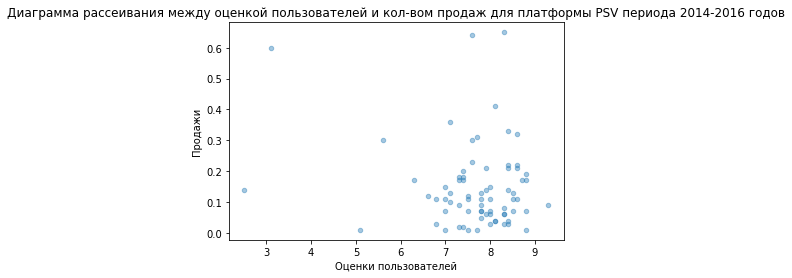

Корреляция между оценкой пользователей и кол-вом продаж для платформы PSV составляет -0.16845504978064446


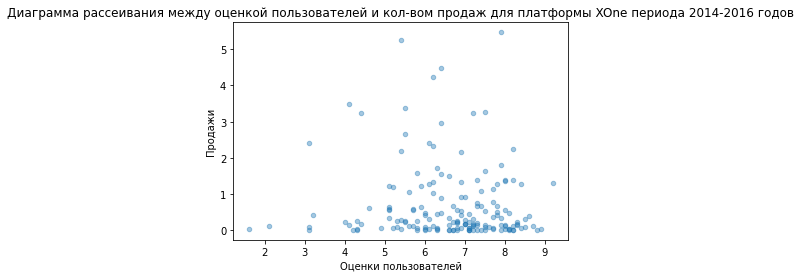

Корреляция между оценкой пользователей и кол-вом продаж для платформы XOne составляет -0.0703839280647581


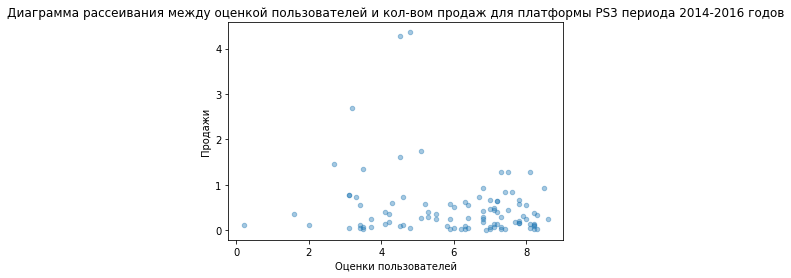

Корреляция между оценкой пользователей и кол-вом продаж для платформы PS3 составляет -0.16676141347662118


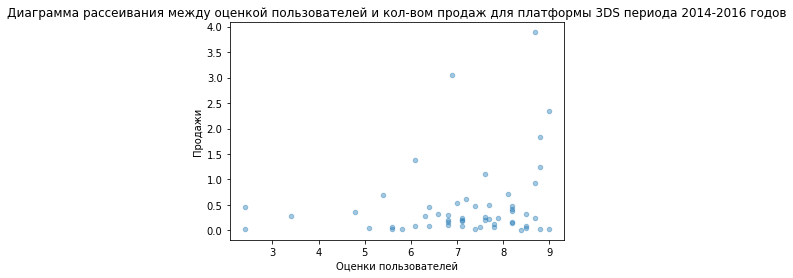

Корреляция между оценкой пользователей и кол-вом продаж для платформы 3DS составляет 0.2151932718527028


In [80]:
#составляем цикл из 5 платформ актуального периода, в которых было больше всего разработанных игр 
for d in data_actual['platform'].value_counts(ascending = False).index[:5]:#unique()[:4]:
    data_actual.query('user_score > 0 and platform == @d')\
        .plot(kind = 'scatter', x = 'user_score', y = 'all_sales', figsize = (6,4), alpha = 0.4, \
              ylabel = 'Продажи', xlabel = 'Оценки пользователей')
    plt.title(f'Диаграмма рассеивания между оценкой пользователей и кол-вом продаж для платформы {d} периода 2014-2016 годов')
    plt.show()
    print(f"Корреляция между оценкой пользователей и кол-вом продаж для платформы {d} составляет \
{data_actual.query('user_score > 0 and platform == @d')['user_score'].corr(data_actual.query('user_score > 0 and platform == @d')['all_sales'])}")

**Полученная величина корреляции подтверждает данные графика: между оценкой пользователей и кол-вом продаж в большинстве приставок практически отсутствует взаимосвязь**

#### Влияние оценок пользователей и критиков на продажи для всех платформ

Получив результаты рассеивания и корреляции для одной, хоть и популярной игры, нельзя однозначно сделать вывод обо всех играх сразу, для этого посчитаем корреляции между оценками пользователей/критиков и сумарными продажами для каждой платформы за актуальный период и нанесем эти полученные значения на один график столбчатой диаграммы, для того, чтобы понять какие значения корреляции встречаются чаще всего.

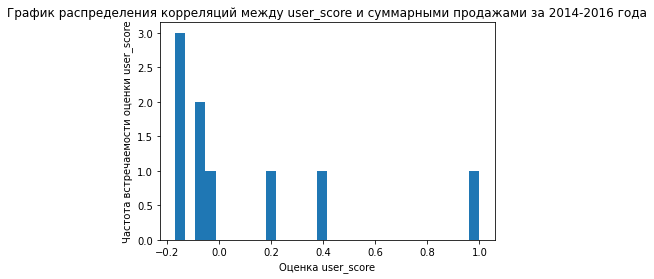

Медианное значение корреляции между user_score и суммарными продажами = -0.07


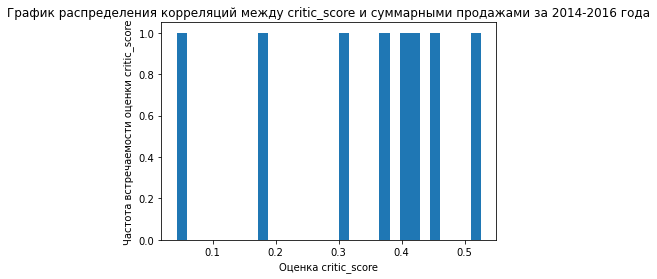

Медианное значение корреляции между critic_score и суммарными продажами = 0.39


In [81]:
#создаем цикл со значениями критиков и пользователей, чтобы разделить результаты корректно на два разных графика
for s in ['user_score','critic_score']:
#создаем пустой список для наполнения его значениями корреляции
    score_corr = []
#получаем список из всех наименований платформ для просчета корреляции для каждого типа платформы
    for p in data_actual['platform'].unique():
#просчитываем корреляцию между оценкой и суммарными продажами для каждой платформы и записываем значение во временную переменную
        up = data_actual.loc[(data[s] > 0) & (data_actual['platform'] == p), s].\
        corr(data_actual.loc[(data[s] > 0) & (data_actual['platform'] == p), 'all_sales'])
#наполняем наш список со значениями корреляции на каждой итерации цикла
        score_corr.append(up)
#преобразуем список в объект Series и строим столбчатую диаграмму для всех полученных значений
    score_corr = pd.Series(score_corr)
    score_corr.plot(kind = 'hist', bins = 30)
#подписываем грфафик
    plt.xlabel(f'Оценка {s}')
    plt.ylabel(f'Частота встречаемости оценки {s}')
    plt.title(f'График распределения корреляций между {s} и суммарными продажами за 2014-2016 года')
    plt.show()
#показываем медианное значение корреляции для каждого графика
    print(f'Медианное значение корреляции между {s} и суммарными продажами = {round(score_corr.median(),2)}')

**Результаты изучения взаимосвязи между оценками и кол-вом суммарных продаж показали следующие результаты:**
- между оценками критиков и суммарными продажами присутствует прямая зависимость, но не явно выраженная, медианное значение коэффициента корреляции для всех платформ актуального периода: 0.39
- между оценками пользователей и суммарными продажами взаимосвязь практически отсутствует, медианное значение коэффициента корреляции для всех платформ актуального периода: - 0,07.
- при выборе наиболее перспективных игр для продажи лучше ориентироваться на отзывы критиков, чем пользователей, так как в среднем зависимость между оценкой критиков и продажами в разы сильней, чем зависимость между оценкой пользователей и продажами

### Распределение продаж и разработанных игр в зависимости от жанра

Для начала создадим сводную таблицу, сгруппировав основную актуальную таблицу по жанрам и посчитав для каждого типа жанра суммарные продажи, кол-во выпущенных игр, для оценки прибыльности платформы рассмотрим медианное значение продаж, чтобы понимать кол-во проданных копий обусловленно большим кол-вом разработанных игр, либо каждая игра продается в большом кол-ве (так как по диаграмме размаха предыдущего раздела было видно, что во всех категориях присутствует много выборосов и средние значения сильно отличаются от медианных значений, которые более устойчивы к выбросам, поэтому будем использовать именно медианные значения)

In [87]:
data_rating_genre = data_actual.pivot_table(index = 'genre', values = ['name','all_sales'], aggfunc = {'all_sales':['sum','median'],'name':'count'})\
            .reset_index()
#переименуем столбцы для удобства обращения к ним в дальнейшем
data_rating_genre.columns = ['genre','median','sum','count'] 
data_rating_genre

,genre,median,sum,count
0,Action,0.090,199.36,619
1,Adventure,0.030,17.55,185
2,Fighting,0.125,28.22,60
3,Misc,0.090,37.55,113
4,Platform,0.140,18.09,38
5,Puzzle,0.045,2.21,14
6,Racing,0.090,27.52,69
7,Role-Playing,0.110,101.44,221
8,Shooter,0.515,170.94,128
9,Simulation,0.100,13.13,44


*Таблица составлена, следующим шагом построим следующие столбчатые диаграммы для визуализации и лучшего понимания информации:*
- распределение разработанных игр по жанрам за актуальный период
- распределение суммарных продаж по жанрам
- распрелеление медианных значений кол-ва проданных копий одной игры для каждого жанра

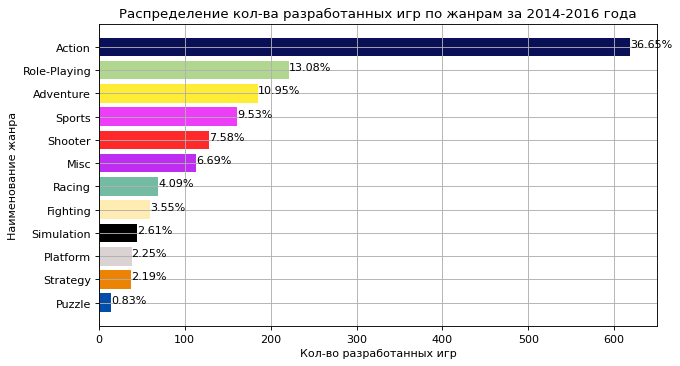

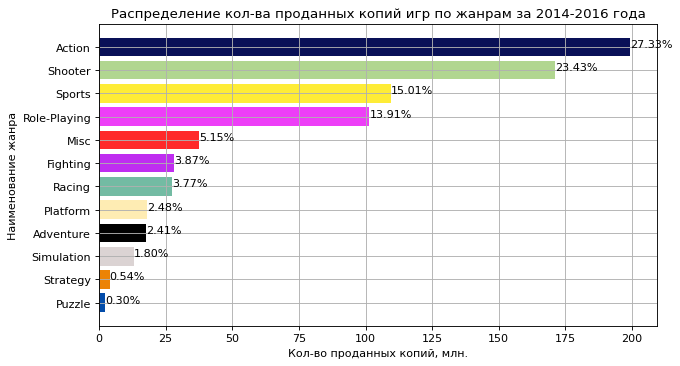

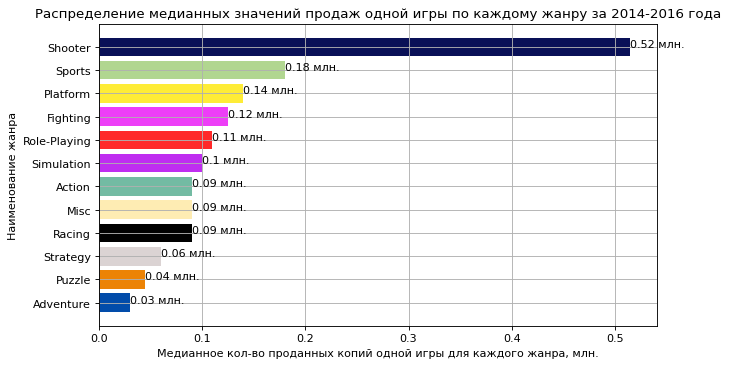

In [88]:
for d in ['count','sum','median']:
    #создаем список цветов для использования в цикле
    colors = ['#024CAA','#EC8305','#DBD3D3', 'black','#FEECB3','#73BBA3','#BF2EF0','#FF2929','#ED3EF7','#FEEC37','#B1D690','#091057']
    data_rating_genre = data_rating_genre.sort_values(by = d, ascending = True)
    plt.figure(figsize = (9,5), dpi = 80)
    plt.grid(True)
    #параметр color не работает если указывать его в скобках метода .plot(), поэтому график создаем поэтапно черер plt.
    plt.barh(data_rating_genre['genre'],data_rating_genre[d], color = colors)
    plt.ylabel('Наименование жанра')
    if d == 'count':
        #добавляем отображение процентов от общего кол-ва для подписи каждого жанра
        for index, value in enumerate(data_rating_genre[d]):
            plt.text(value, index, f"{value/(data_rating_genre[d].sum()):.2%}")
            #добавляем описание осей и название
            plt.title('Распределение кол-ва разработанных игр по жанрам за 2014-2016 года')
            plt.xlabel('Кол-во разработанных игр')
    elif d == 'sum':
        for index, value in enumerate(data_rating_genre[d]):
            plt.text(value, index, f"{value/(data_rating_genre[d].sum()):.2%}")
            plt.title('Распределение кол-ва проданных копий игр по жанрам за 2014-2016 года')
            plt.xlabel('Кол-во проданных копий, млн.')
    elif d == 'median':
        for index, value in enumerate(data_rating_genre[d]):
            plt.text(value, index, f"{round(value,2)} млн.")
            plt.title('Распределение медианных значений продаж одной игры по каждому жанру за 2014-2016 года')
            plt.xlabel('Медианное кол-во проданных копий одной игры для каждого жанра, млн.')
        

**Полученный график кол-ва разработанных игр разных жанров позволяет сделать следующие выводы:**
- лидером с большим отрывов по кол-ву разработанных игр является жанр Action, (36,6% игр всего рынка)
- меньше всего разработанных игр жанра Puzzle (0.83% от общего кол-ва игр)

**График распределения проданных копий игр разных жанров суммарно по всем регионам позволяет определить:**

**4 жанра с самым большим кол-вом проданных копий:**
- Action, 27.33% от общего кол-ва продаж
- Shooter, 23.43% от общего кол-ва продаж
- Sports, 15.01% от общего кол-ва продаж
- Role-playing, 13.91% от общего кол-ва продаж

**3 жанра с самым маленьким кол-вом проданных копий**
- Puzzle, 0.3% от общего кол-ва продаж
- Strategy, 0.54% от общего кол-ва продаж
- Simulation, 1.8% от общего кол-ва продаж

График распределения медианных значений кол-ва проданных копий одной игры для каждого жанра позволяет увидеть, что самым прибыльным жанром является жанр Shooter, так как при 7,58% объема игр такого жанра от общего кол-ва он показывает самое высокое медианное значение для продажи одной игры такого жанра - 0,52 млн копий, что позволило ему быть на 2 месте даже по общему кол-ву проданных копий жанра. Медианное значение продаж одной игры жанра позволяет сделать вывод о прибыльности такого жанра в целом.

**Топ-5 прибыльных жанров с самым высоким медианным значением продаж одной игры суммарно по всем регионам**
- Shooter, 0.52 млн. (7.58% объема игр от общего кол-ва)
- Sports, 0.18 млн. (9.53% объема игр от общего кол-ва)
- Platform, 0.14 млн. (всего 2.25% объема игр от общего кол-ва)
- Fighting, 0.12 млн. (3.55% объема игр от общего кол-ва)
- Role-playing 0.11 млн (13.08% объема игр от общего кол-ва)

**Полученные результаты исследовательского анализа помогли сделать следующие выводы:**
- до 1995 года игр выпускалось очень мало. Больше всего игр выпускалось в 2008 - 2009 годах
- лидеры по продажам игр за все время - PS2, X360, Wii, PS3, DS, PS
- примерное время жизни платформ-лидеров по продажам составил 8-10 лет, расчеты же продаж для всех платформ показали, что жизненный цикл приставки составлет примерно 6 лет.
- тенденция кол-ва продаж у приставок отрицательная, у всех приставок продажи падают
- на фоне остальных на текущий момент большее кол-во продаж показывают: `PS4`, `XOne`, `3DS`
- молодых приставок с интересной тенденцией для роста намного меньше, чем это было раньше, когда приставки были очень популярны, и они выпускались одна за другой версией. 
- для дальнейшего исследования выбран актуальный период с 2014 по 2016 год (последние 3 года), что соответсвует половине примерно посчитанного периода жизни платформы. Так как рынок динамичный, то направленность пользователей из года в год меняется и более долгий промежуток времени исказит результаты, тем более в 2008-2009 году было выпущено самое большое кол-во игр в год за все время, и эти игры также уже могут быть не актуальны для настоящих пользователей.

**Диаграмма размаха с разбивкой по платформам позволила сделать следующие выводы:**
- в среднем кол-во продаж у одного из лидеров рынка - платформы PS4 меньше, чем у его основного конкурента - XOne, но игр на PS4 разработано больше, поэтому и игр, продающихся в аномально большом кол-ве тоже больше, чем у XOne.
- при сравнении более старых моделей двух основных конкурентов - PS3 и X360 видна та же тенденция: на платформе  PS3 опять разрабатывалось игр  намного больше, чем на X360, но у X360 опять как и медианное значение проданных копий игры выше, так и среднее.
- на третьего лидера по объему продаж на 2016 года - платформу 3DS разрабатывается не мало игр, но вот медианное значение намного ниже и , они продают много игр, но в меньшем объеме, чем основные конкуренты
- у приставки PSV большой объем продаваемых игр, как у лидеров рынка, но каждая игра продается в намного меньшем объеме
- у большинства игр наблюдается много значений - выбросов, значит некоторые игры продаются в очень большом объеме и становятся бестселлерами


**Результаты изучения взаимосвязи между оценками и кол-вом суммарных продаж показали следующие результаты:**
- между оценками критиков и суммарными продажами присутствует прямая зависимость, но не явно выраженная, медианное значение коэффициента корреляции для всех платформ актуального периода: 0.39
- между оценками пользователей и суммарными продажами взаимосвязь практически отсутствует, медианное значение коэффициента корреляции для всех платформ актуального периода: - 0,07.
- при выборе наиболее перспективных игр для продажи лучше ориентироваться на отзывы критиков, чем пользователей, так как в среднем зависимость между оценкой критиков и продажами в разы сильней, чем зависимость между оценкой пользователей и продажами

**Результаты изучения кол-ва разработанных игр разных жанров позволили сделать следующие выводы:**
- лидером с большим отрывов по кол-ву разработанных игр является жанр Action, (36,6% игр всего рынка)
- меньше всего разработанных игр жанра Puzzle (0.83% от общего кол-ва игр)

**Результаты изучения общего кол-ва проданных копий разных жанров позволили определить:**

**4 жанра с самым большим кол-вом проданных копий:**
- Action, 27.33% от общего кол-ва продаж
- Shooter, 23.43% от общего кол-ва продаж
- Sports, 15.01% от общего кол-ва продаж
- Role-playing, 13.91% от общего кол-ва продаж

**3 жанра с самым маленьким кол-вом проданных копий**
- Puzzle, 0.3% от общего кол-ва продаж
- Strategy, 0.54% от общего кол-ва продаж
- Simulation, 1.8% от общего кол-ва продаж

**Результаты изучения прибыльности разных жанров позволили составить:**

**Топ-5 прибыльных жанров с самым высоким медианным значением продаж одной игры суммарно по всем регионам:**
- Shooter, 0.52 млн. (7.58% объема игр от общего кол-ва)
- Sports, 0.18 млн. (9.53% объема игр от общего кол-ва)
- Platform, 0.14 млн. (всего 2.25% объема игр от общего кол-ва)
- Fighting, 0.12 млн. (3.55% объема игр от общего кол-ва)
- Role-playing 0.11 млн (13.08% объема игр от общего кол-ва)

## Составление портрета пользователя каждого региона

### Популярные платформы для пользователей каждого региона

Построим столбчатую диаграмму для всех платформ и для всех регионов сразу

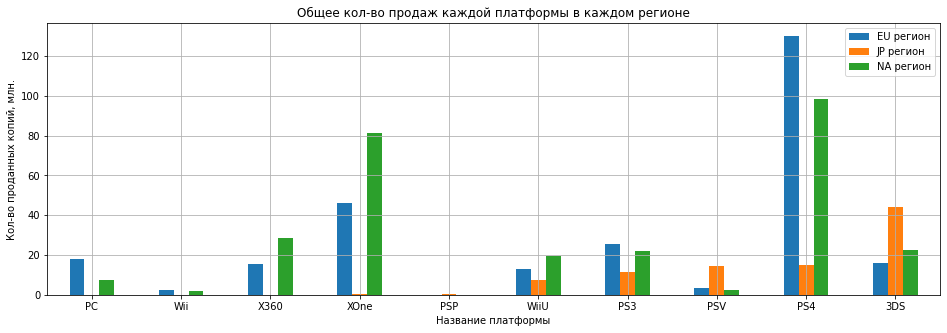

In [89]:
data_actual.pivot_table(index = 'platform', values = ['na_sales','eu_sales','jp_sales'], aggfunc={'sum'}).\
    sort_values(by = ('jp_sales', 'sum')).\
    plot(kind = 'bar', figsize = (16,5), grid = True, title = 'Общее кол-во продаж каждой платформы в каждом регионе')
plt.xlabel('Название платформы')
plt.ylabel('Кол-во проданных копий, млн.')
plt.legend(['EU регион','JP регион','NA регион'])
plt.xticks(rotation = 0)
plt.show()

График показывает, что лидерами среди платформ по объему продаж во всех регионах вместе взятых являются: PS4, XOne и 3DS, "старичок" PS3 уже отстает от конкурентов. Выделяется регион JP, в котором практически отсутствуют продажи XOne, но зато лучше других регионов идут продажи игр платформы 3DS. Хоть у X360 и PS3 уже почти нет продаж на текущий 2016 год, но они набрали свои продажи за предыдущие года.
Теперь построим круговые диаграммы для каждого региона, чтобы точно определить доли топ-5 лидеров в каждом регионе

/tmp/ipykernel_94/1065968412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actual['platform_group'] = data_actual['platform'].where(data_actual['platform'].\


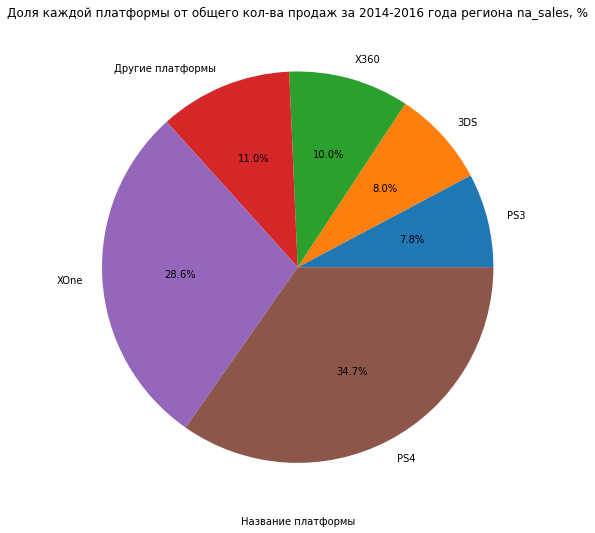

/tmp/ipykernel_94/1065968412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actual['platform_group'] = data_actual['platform'].where(data_actual['platform'].\


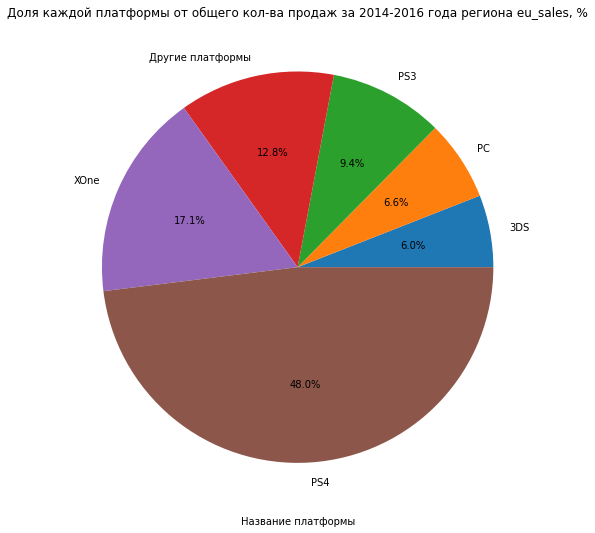

/tmp/ipykernel_94/1065968412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actual['platform_group'] = data_actual['platform'].where(data_actual['platform'].\


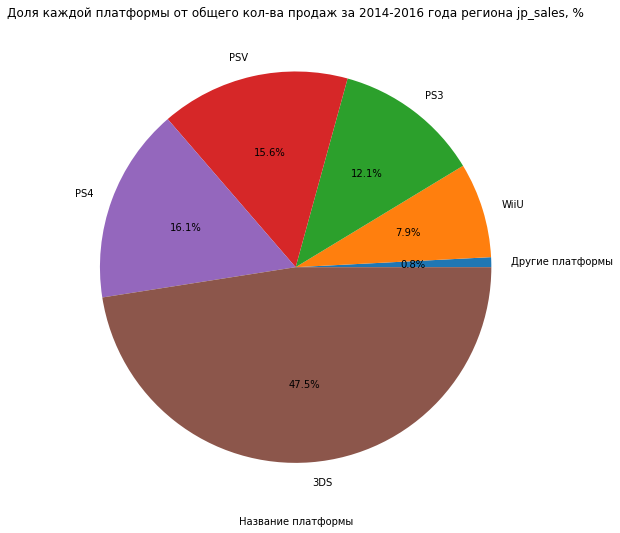

In [92]:
#создаем цикл со списком всех трех исследуемых регионов
for d in ['na_sales','eu_sales','jp_sales']:
#добавляем столбец для хранения в нем либо топ-5 названий платформ на каждой итерации цикла, которые будут сменять друг друга 
# для разных регионов, перезаписывая значение столбца, либо для замены названия всех остальных платформ на `другие платформы`     
    data_actual['platform_group'] = data_actual['platform'].where(data_actual['platform'].\
#создаем список для топ-5 платформ по продажам универсальным для всех регионов, с ним и будет проверяться значение столбца
#'platform' и при совпадении название платформы неизменным запишется в новый столбец 'platform_group', а при несовпадении 
#название платформы поменяется на 'другие платформы'
    isin(data_actual.pivot_table(index = 'platform',values = d, aggfunc=('sum')).sort_values(by = d, ascending = False).index[:5]),'Другие платформы')
#создаем сводную таблицу с суммарными продажами по платформам, группируя по новому столбцу 'platform_group' и строим график
    data_actual.pivot_table(index = 'platform_group', values = d, aggfunc={'sum'}).sort_values(by = 'sum', ascending = True).\
    plot(kind = 'pie', y = 'sum', figsize = (13,9), legend = False, autopct = '%.1f%%')
    plt.xlabel('Название платформы')
    plt.ylabel('')
    plt.title(f'Доля каждой платформы от общего кол-ва продаж за 2014-2016 года региона {d}, %')
    plt.show()

**Общий график кол-ва продаж каждой платформы для всех регионов показал, что лидеры по объему продаж суммарно в регионах являются: PS4, XOne и 3DS.**

Полученные графики доли продаж каждой платформы каждого региона позволили составить топ-5 платформ по продажам для каждого региона:*

**Регион NA:**  

- PS4 (34.7% продаж от общего кол-ва)
- XOne (28.6% продаж от общего кол-ва)
- X360 (10% продаж от общего кол-ва)
- 3DS (8% продаж от общего кол-ва)
- PS3 (7.8% продаж от общего кол-ва)

**Регион EU:**

- PS4 (48% продаж от общего кол-ва)
- XOne (17.1% продаж от общего кол-ва)
- PS3 (9.4% продаж от общего кол-ва)
- PC (6.6% продаж от общего кол-ва)
- 3DS (6% продаж от общего кол-ва)

**Регион JP:**
   
- 3DS (47.5% продаж от общего кол-ва)
- PS4 (16.1% продаж от общего кол-ва)
- PSV (15.6% продаж от общего кол-ва)
- PS3 (12.1% продаж от общего кол-ва)
- WiiU (7.9% продаж от общего кол-ва)

### Популярные жанры для пользователей каждого региона

Построим столбчатую диаграмму для всех жанров, сгруппировав значения продаж по регионам

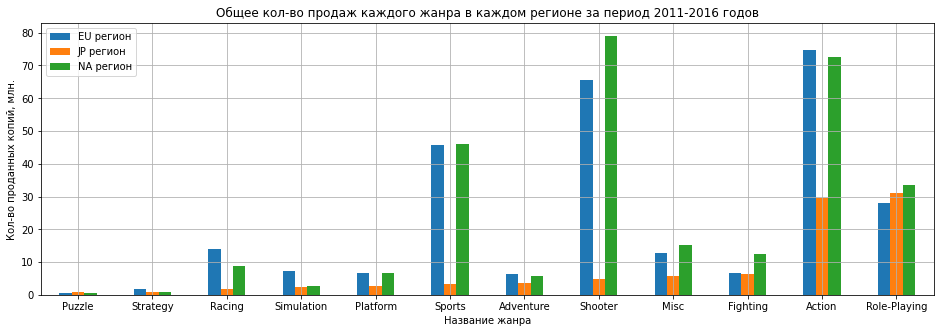

In [94]:
data_actual.pivot_table(index = 'genre', values = ['na_sales','eu_sales','jp_sales'], aggfunc={'sum'}).\
    sort_values(by = ('jp_sales', 'sum')).\
    plot(kind = 'bar', figsize = (16,5), grid = True,\
         title = 'Общее кол-во продаж каждого жанра в каждом регионе за период 2011-2016 годов')
plt.xlabel('Название жанра')
plt.ylabel('Кол-во проданных копий, млн.')
plt.legend(['EU регион','JP регион','NA регион'])
plt.xticks(rotation = 0)
plt.show()

Лидерами по продажам среди всех регионов являются: Action, Shooter, Role-Playing и Sports. Теперь доли популярных жанров в каждом регионе.

Строим круговые диаграммы долей жанров от общего кол-ва продаж в каждом регионе

/tmp/ipykernel_94/1023270408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actual['genre_group'] = data_actual['genre'].where(data_actual['genre'].\


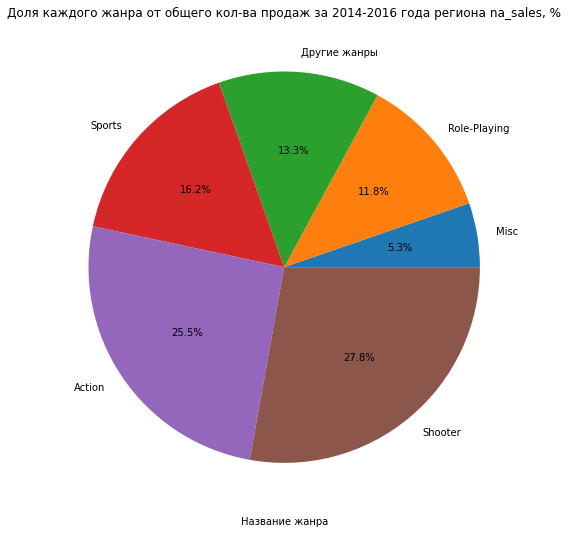

/tmp/ipykernel_94/1023270408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actual['genre_group'] = data_actual['genre'].where(data_actual['genre'].\


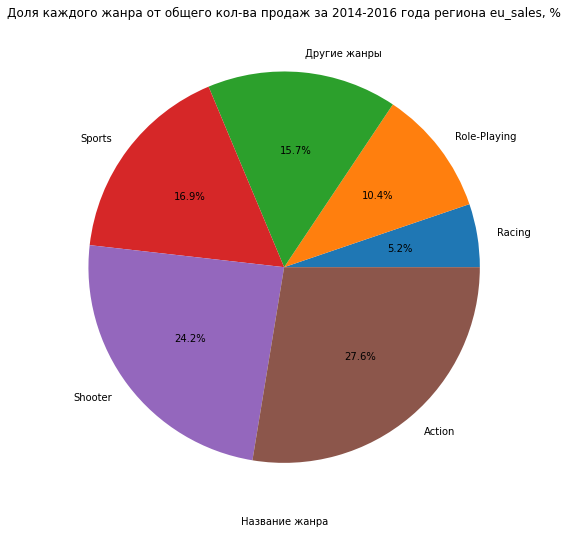

/tmp/ipykernel_94/1023270408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actual['genre_group'] = data_actual['genre'].where(data_actual['genre'].\


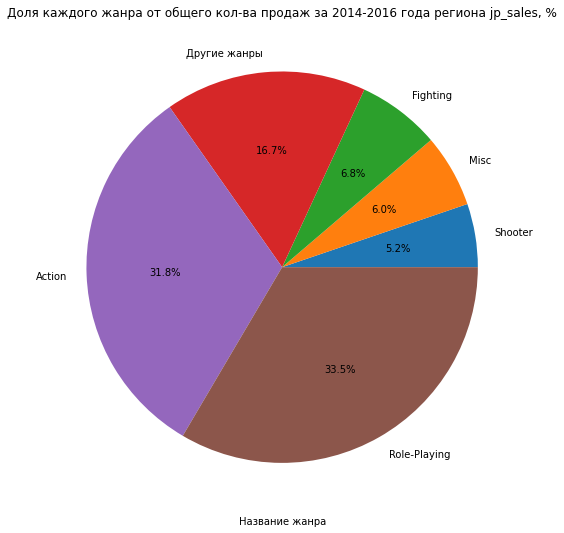

In [96]:
#создаем цикл со списком всех трех исследуемых регионов
for d in ['na_sales','eu_sales','jp_sales']:
#добавляем столбец для хранения в нем либо топ-5 названий жанров на каждой итерации цикла, которые будут сменять друг друга 
# для разных регионов, перезаписывая значение столбца, либо для замены названия всех остальных жанров на `другие жанры`     
    data_actual['genre_group'] = data_actual['genre'].where(data_actual['genre'].\
#создаем список для топ-5 жанров по продажам универсальным для всех регионов, с ним и будет проверяться значение столбца
#'genre' и при совпадении название жанра неизменным запишется в новый столбец genre_group, а при несовпадении 
#название жанра поменяется на 'другие жанры'
    isin(data_actual.pivot_table(index = 'genre',values = d, aggfunc=('sum')).sort_values(by = d, ascending = False).index[:5]),'Другие жанры')
#создаем сводную таблицу с суммарными продажами по платформам, группируя по новому столбцу 'genre_group' и строим график
    data_actual.pivot_table(index = 'genre_group', values = d, aggfunc={'sum'}).sort_values(by = 'sum', ascending = True).\
    plot(kind = 'pie', y = 'sum', figsize = (13,9), legend = False, autopct = '%.1f%%')
    plt.xlabel('Название жанра')
    plt.ylabel('')
    plt.title(f'Доля каждого жанра от общего кол-ва продаж за 2014-2016 года региона {d}, %')
    plt.show()

Полученные графики распределения популярности жанров по регионам позволили сделать следующие выводы:
    
**Лидерами по объему продаж среди всех регионов являются жанры: Action, Shooter, Role-Playing и Sports.**
    
*Полученные графики доли продаж каждого жанра в регионах позволили составить топ-5 жанров по продажам для каждого региона:*

**Регион NA:**  

- Shooter (27.8% продаж от общего кол-ва)
- Action (25.5% продаж от общего кол-ва)
- Sports (16.2% продаж от общего кол-ва)
- Role-Playing (11.8% продаж от общего кол-ва)
- Misc (5.3% продаж от общего кол-ва)

**Регион EU:**

- Action (27.6% продаж от общего кол-ва)
- Shooter (24.2% продаж от общего кол-ва)
- Sports (16.9% продаж от общего кол-ва)
- Role-Playing (10.4% продаж от общего кол-ва)
- Racing (5.2% продаж от общего кол-ва)

**Регион JP:**
    
- Role-Playing (33.5% продаж от общего кол-ва)
- Action (31.8% продаж от общего кол-ва)
- Fighting (6.8% продаж от общего кол-ва)
- Misc (6% продаж от общего кол-ва)
- Shooter (5,2% продаж от общего кол-ва)

 *Жанр Shooter стал не таким популярным для региона JP в отличие от жанра Role-Playing, который лидирует в этом регионе*

### Влияние рейтинга ESRB на продажи в отдельных регионах

Построим столбчатую диаграмму распределения продаж по рейтингам, сгруппировав значения по регионам, не будем учитывать значения `unknown`

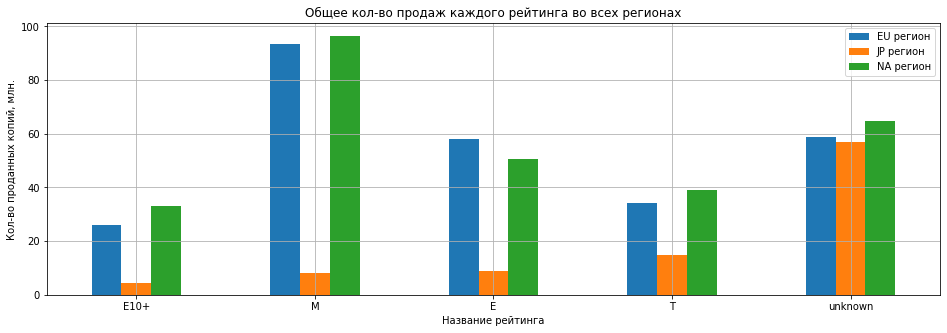

In [97]:
data_actual.\
    pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc={'sum'}).\
    sort_values(by = ('jp_sales', 'sum')).\
    plot(kind = 'bar', figsize = (16,5), grid = True, title = 'Общее кол-во продаж каждого рейтинга во всех регионах')
plt.xlabel('Название рейтинга')
plt.ylabel('Кол-во проданных копий, млн.')
plt.legend(['EU регион','JP регион','NA регион'])
plt.xticks(rotation = 0)
plt.show()

*Расшифровка рейтингов:*

- E10+ - для лиц старше 10 лет
- T - для лиц старше 13 лет
- M - для лиц, старше 17 лет
- E - для всех возрастных категорий
- unknown - рейтинг не 

**Изучение влияния рейтинга ESRB показало следующие результаты:**
- наблюдается зависимость: чем выше возрастной рейтинг игры, тем больше на нее приходится продаж.
- рейтинг ESRB подогревает интерес большинства покупателей к играм с самым высоким рейтингом M (позволящий включать сцены 
реалистичного насилия, ненормативной лексики и употребления табака с алкоголем ), благодаря этому игры с таким рейтингом 
занимают лидирующую позицию по продажам с большим отрывом от конкурентов в 2-ух регионах - NA и EU. В тоже же время у этого же 
рейтинга M не наблюдается самая большая доля продаж из всех рейтингов в регионе JP, что может быть связано с более жесткой 
политикой в отношении проверки возраста покупателя, либо других ограничениях этого региона. 
- на втором месте по суммарным продажам находится категория игр без определенного рейтинга, это может быть связано с тем, что все больше появляются и являются популярными онлайн-игры, для которых рейтинг ESRB не определяется. Даже регион JP, который во всех остальных возрастных рейтингах отставал от от других регионов, здесь показывает схожее кол-во продаж. Категория без определенного рейтинга очень выгодна для продаж.**

*Промежутоные выводы по текущему разделу:*

**Полученные результаты изучения пользователей каждого региона за актуальный период 2014-2016 годов позволили сделать следующие выводы:**

**Лидеры по объему продаж суммарно во всех регионах являются платформы: PS4, XOne и 3DS.** 

Полученные графики доли продаж каждой платформы каждого региона позволили составить топ-5 платформ по продажам для каждого региона:*

**Регион NA:**  

- PS4 (34.7% продаж от общего кол-ва)
- XOne (28.6% продаж от общего кол-ва)
- X360 (10% продаж от общего кол-ва)
- 3DS (8% продаж от общего кол-ва)
- PS3 (7.8% продаж от общего кол-ва)

**Регион EU:**

- PS4 (48% продаж от общего кол-ва)
- XOne (17.1% продаж от общего кол-ва)
- PS3 (9.4% продаж от общего кол-ва)
- PC (6.6% продаж от общего кол-ва)
- 3DS (6% продаж от общего кол-ва)

**Регион JP:**
   
- 3DS (47.5% продаж от общего кол-ва)
- PS4 (16.1% продаж от общего кол-ва)
- PSV (15.6% продаж от общего кол-ва)
- PS3 (12.1% продаж от общего кол-ва)
- WiiU (7.9% продаж от общего кол-ва)


Полученные графики распределения популярности жанров по регионам позволили сделать следующие выводы:
    
**Лидерами по объему продаж среди всех регионов являются жанры: Action, Shooter, Role-Playing и Sports.**
    
*Полученные графики доли продаж каждого жанра в регионах позволили составить топ-5 жанров по продажам для каждого региона:*

**Регион NA:**  

- Shooter (27.8% продаж от общего кол-ва)
- Action (25.5% продаж от общего кол-ва)
- Sports (16.2% продаж от общего кол-ва)
- Role-Playing (11.8% продаж от общего кол-ва)
- Misc (5.3% продаж от общего кол-ва)

**Регион EU:**

- Action (27.6% продаж от общего кол-ва)
- Shooter (24.2% продаж от общего кол-ва)
- Sports (16.9% продаж от общего кол-ва)
- Role-Playing (10.4% продаж от общего кол-ва)
- Racing (5.2% продаж от общего кол-ва)

**Регион JP:**
    
- Role-Playing (33.5% продаж от общего кол-ва)
- Action (31.8% продаж от общего кол-ва)
- Fighting (6.8% продаж от общего кол-ва)
- Misc (6% продаж от общего кол-ва)
- Shooter (5,2% продаж от общего кол-ва)

 *Жанр Shooter не такой популярный для региона JP в отличие от жанра Role-Playing, который лидирует в этом регионе*


**Изучение влияния рейтинга ESRB показало следующие результаты:**
- наблюдается зависимость: чем выше возрастной рейтинг игры, тем больше на нее приходится продаж.
- рейтинг ESRB подогревает интерес большинства покупателей к играм с самым высоким рейтингом M (позволящий включать сцены 
реалистичного насилия, ненормативной лексики и употребления табака с алкоголем ), благодаря этому игры с таким рейтингом 
занимают лидирующую позицию по продажам с большим отрывом от конкурентов в 2-ух регионах - NA и EU. В тоже же время у этого же 
рейтинга M не наблюдается самая большая доля продаж из всех рейтингов в регионе JP, что может быть связано с более жесткой 
политикой в отношении проверки возраста покупателя, либо других ограничениях этого региона. 
- на втором месте по суммарным продажам находится категория игр без определенного рейтинга, это может быть связано с тем, что все больше появляются и являются популярными онлайн-игры, для которых рейтинг ESRB не определяется. Даже регион JP, который во всех остальных возрастных рейтингах отставал от от других регионов, здесь показывает схожее кол-во продаж. Категория без определенного рейтинга очень выгодна для продаж.


## Проверка гипотез

### Сравнение пользовательских рейтингов платформ Xbox One и PC

Необходимо проверить равенство средних пользовательских рейтингов для двух платформ: Xbox One и PC. Сформулируем нулевую и альтернативную гипотезы.
Так как мы проверяем равенство средних двух независимых выборок, то будем использовать двухвыборочный T-тест для двух независимых сборок.

- H0 - средние оценки пользователей игровых платформ Xbox One и PC равны
- H1 - средние оценки пользователей игровых платформ Xbox One и PC не равны

In [99]:
#зададим пороговое значение статистической значимости в 5%
alpha = 0.05
print('Среднее значение для выборки пользовательского рейтинга платформы Xbox One:', \
      data_actual.query('user_score > 0 and platform =="XOne"')['user_score'].mean())
print('Среднее значение для выборки пользовательского рейтинга платформы PC:', \
      data_actual.query('user_score > 0 and platform == "PC"')['user_score'].mean())
results_platform = st.ttest_ind(data_actual.query('user_score > 0 and platform =="XOne"')['user_score'],\
                             data_actual.query('user_score > 0 and platform =="PC"')['user_score'])
print(f'p-value: {results_platform.pvalue}')

if results_platform.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Среднее значение для выборки пользовательского рейтинга платформы Xbox One: 6.594545454545456
Среднее значение для выборки пользовательского рейтинга платформы PC: 6.298360655737705
p-value: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Вероятность того, что разница между средними двух выборок будет равна нулю намного больше уровня статистической значимости,  поэтому нулевая гипотеза не может быть отвергнута. Следовательно можно говорить о том, что с большой долей вероятности средние значения двух выборок - пользовательских рейтингов XboxOne и PC, не имеют статистически значимых отличий.**

### Сравнение пользовательских рейтингов жанров Action и Sports

Необходимо проверить равенство средних пользовательских рейтингов для двух жанров: Action и Sports. Сформулируем нулевую и альтернативную гипотезы.
Так как мы проверяем не равны ли средние двух независимых выборок, то будем использовать двухвыборочный T-тест для двух независимых сборок.

- H0 - средние оценки пользователей жанров Action и Sports равны
- H1 - средние оценки пользователей жанров Action и Sports не равны (так как вопрос состоит именно не больше или меньше, а именно не равны ли пользовательские рейтинги)

In [101]:
#зададим пороговое значение статистической значимости в 5%
alpha = 0.05
print('Среднее значение для выборки пользовательского рейтинга жанра Action:', \
      data_actual.query('user_score > 0 and genre =="Action"')['user_score'].mean())
print('Среднее значение для выборки пользовательского рейтинга платформы PC:', \
      data_actual.query('user_score > 0 and genre == "Sports"')['user_score'].mean())
results_genre = st.ttest_ind(data_actual.query('user_score > 0 and genre =="Action"')['user_score'],\
                             data_actual.query('user_score > 0 and genre == "Sports"')['user_score'])
print(f'p-value: {results_genre.pvalue}')

if results_genre.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Среднее значение для выборки пользовательского рейтинга жанра Action: 6.760606060606061
Среднее значение для выборки пользовательского рейтинга платформы PC: 5.2251968503937
p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Вероятность того, что средние значения этих двух жанров одинаковы, намного меньше уровня статистической значимости, поэтому нулевая гипотеза о равенстве средних для этих двух совокупностей отвергается в польщу альтернавтивной гипотезы. Можно говорить о том, что с большой вероятностью средние пользовательские оценки жанров Action и Sports не равны.**

**При проверке гипотез получились следующие результаты:**
- пользовательские оценки XboxOne и PC равны.
- пользовательские оценки жанров Action и Sports не равны.

## Общие выводы

**На этапе предобработки данных были выполнены следующие действия:**

- столбцы переименованы и приведены к нижнему регистру
- обнаруженные пропуски в столбцах заменены на шаблонные значения
- изменены типы данных в столбцах
- обнаруженные аномальные значения заменены на шаблонные
- в датафрейм добавлен новый столбец с суммарными продажами по всем регионам
- удалены неявные дубликаты, проведена проверка на наличие явных дубликатов

**Полученные результаты исследовательского анализа помогли сделать следующие выводы:**
- до 1995 года игр выпускалось очень мало. Больше всего игр выпускалось в 2008 - 2009 годах
- лидеры по продажам игр за все время - PS2, X360, Wii, PS3, DS, PS
- примерное время жизни платформ-лидеров по продажам составил 8-10 лет, расчеты же продаж для всех платформ показали, что жизненный цикл приставки составлет примерно 6 лет.
- тенденция кол-ва продаж у приставок отрицательная, у всех приставок продажи падают
- на фоне остальных на текущий момент 2016 года большее кол-во продаж показывают: `PS4`, `XOne`, `3DS`
- молодых приставок с интересной тенденцией для роста намного меньше, чем это было раньше, когда приставки были очень популярны, и они выпускались одна за другой версией. 
- для дальнейшего исследования выбран актуальный период с 2014 по 2016 год (последние 3 года), что соответсвует половине примерно посчитанного периода жизни платформы. Так как рынок динамичный, то направленность пользователей из года в год меняется и более долгий промежуток времени исказит результаты, тем более в 2008-2009 году было выпущено самое большое кол-во игр в год за все время, и эти игры также уже могут быть не актуальны для настоящих пользователей.

**Диаграмма размаха с разбивкой по платформам позволила сделать следующие выводы:**
- в среднем кол-во продаж у одного из лидеров рынка - платформы PS4 меньше, чем у его основного конкурента - XOne, но игр на PS4 разработано больше, поэтому и игр, продающихся в аномально большом кол-ве тоже больше, чем у XOne.
- при сравнении более старых моделей двух основных конкурентов - PS3 и X360 видна та же тенденция: на платформе  PS3 опять разрабатывалось игр  намного больше, чем на X360, но у X360 опять как и медианное значение проданных копий игры выше, так и среднее.
- на третьего лидера по объему продаж на 2016 года - платформу 3DS разрабатывается не мало игр, но вот медианное значение намного ниже и , они продают много игр, но в меньшем объеме, чем основные конкуренты
- у приставки PSV большой объем продаваемых игр, как у лидеров рынка, но каждая игра продается в намного меньшем объеме
- у большинства игр наблюдается много значений - выбросов, значит некоторые игры продаются в очень большом объеме и становятся бестселлерами


**Результаты изучения взаимосвязи между оценками и кол-вом суммарных продаж показали следующие результаты:**
- между оценками критиков и суммарными продажами присутствует прямая зависимость, но не явно выраженная, медианное значение коэффициента корреляции для всех платформ актуального периода: 0.39
- между оценками пользователей и суммарными продажами взаимосвязь практически отсутствует, медианное значение коэффициента корреляции для всех платформ актуального периода: - 0,07.
- при выборе наиболее перспективных игр для продажи лучше ориентироваться на отзывы критиков, чем пользователей, так как в среднем зависимость между оценкой критиков и продажами в разы сильней, чем зависимость между оценкой пользователей и продажами

**Результаты изучения кол-ва разработанных игр разных жанров позволили сделать следующие выводы:**
- лидером с большим отрывов по кол-ву разработанных игр является жанр Action, (36,6% игр всего рынка)
- меньше всего разработанных игр жанра Puzzle (0.83% от общего кол-ва игр)

**Результаты изучения общего кол-ва проданных копий разных жанров позволили определить:**

*Топ-4 жанра с самым большим кол-вом проданных копий:*
- Action, 27.33% от общего кол-ва продаж
- Shooter, 23.43% от общего кол-ва продаж
- Sports, 15.01% от общего кол-ва продаж
- Role-playing, 13.91% от общего кол-ва продаж

*Топ-3 жанра с самым маленьким кол-вом проданных копий*
- Puzzle, 0.3% от общего кол-ва продаж
- Strategy, 0.54% от общего кол-ва продаж
- Simulation, 1.8% от общего кол-ва продаж

**Результаты изучения прибыльности разных жанров позволили составить:**

*Топ-5 прибыльных жанров с самым высоким медианным значением продаж одной игры суммарно по всем регионам:*
- Shooter, 0.52 млн. (7.58% объема игр от общего кол-ва)
- Sports, 0.18 млн. (9.53% объема игр от общего кол-ва)
- Platform, 0.14 млн. (всего 2.25% объема игр от общего кол-ва)
- Fighting, 0.12 млн. (3.55% объема игр от общего кол-ва)
- Role-playing 0.11 млн (13.08% объема игр от общего кол-ва)


**Полученные результаты изучения пользователей каждого региона за актуальный период 2014-2016 годов позволили сделать следующие выводы:**

**Лидеры по объему продаж суммарно во всех регионах являются платформы: PS4, XOne и 3DS.** 

*Полученные графики доли продаж каждой платформы каждого региона позволили составить топ-5 платформ по продажам для каждого региона:*

**Регион NA:**  

- PS4 (34.7% продаж от общего кол-ва)
- XOne (28.6% продаж от общего кол-ва)
- X360 (10% продаж от общего кол-ва)
- 3DS (8% продаж от общего кол-ва)
- PS3 (7.8% продаж от общего кол-ва)

**Регион EU:**

- PS4 (48% продаж от общего кол-ва)
- XOne (17.1% продаж от общего кол-ва)
- PS3 (9.4% продаж от общего кол-ва)
- PC (6.6% продаж от общего кол-ва)
- 3DS (6% продаж от общего кол-ва)

**Регион JP:**
   
- 3DS (47.5% продаж от общего кол-ва)
- PS4 (16.1% продаж от общего кол-ва)
- PSV (15.6% продаж от общего кол-ва)
- PS3 (12.1% продаж от общего кол-ва)
- WiiU (7.9% продаж от общего кол-ва)


*Полученные графики распределения популярности жанров по регионам позволили сделать следующие выводы:*
    
**Лидерами по объему продаж среди всех регионов являются жанры: Action, Shooter, Role-Playing и Sports.**
    
*Полученные графики доли продаж каждого жанра в регионах позволили составить топ-5 жанров по продажам для каждого региона:*

**Регион NA:**  

- Shooter (27.8% продаж от общего кол-ва)
- Action (25.5% продаж от общего кол-ва)
- Sports (16.2% продаж от общего кол-ва)
- Role-Playing (11.8% продаж от общего кол-ва)
- Misc (5.3% продаж от общего кол-ва)

**Регион EU:**

- Action (27.6% продаж от общего кол-ва)
- Shooter (24.2% продаж от общего кол-ва)
- Sports (16.9% продаж от общего кол-ва)
- Role-Playing (10.4% продаж от общего кол-ва)
- Racing (5.2% продаж от общего кол-ва)

**Регион JP:**
    
- Role-Playing (33.5% продаж от общего кол-ва)
- Action (31.8% продаж от общего кол-ва)
- Fighting (6.8% продаж от общего кол-ва)
- Misc (6% продаж от общего кол-ва)
- Shooter (5,2% продаж от общего кол-ва)


**Изучение влияния рейтинга ESRB показало следующие результаты:**
- наблюдается зависимость: чем выше возрастной рейтинг игры, тем больше на нее приходится продаж.
- ESRB подогревает интерес большинства покупателей к играм с рейтингом M, благодаря этому игры с таким рейтингом уверенно занимают 1 место по продажам в регионах NA и EU, сильно отстает по продажам только регион JP.
- на втором месте по суммарным продажам находится категория игр без определенного рейтинга, включающая онлайн-игры, для которых рейтинг ESRB не определяется. Неотстает от лидеров по продажам такой категории даже регион JP, который во всех остальных возрастных рейтингах отставал от от других регионов, здесь показывает схожее кол-во продаж. Категория без определенного рейтинга очень выгодна для продаж.

**При проверке гипотез получились следующие результаты:**
- пользовательские оценки XboxOne и PC равны.
- пользовательские оценки жанров Action и Sports не равны.
  


**Полученные результаты исследования помогли сформулировать итоговый вывод: перспективными для продажи на будущий 2017 год являются игры:**
- на игровых платформах: `PS4`, `XOne` и в меньшей степени `3DS`
- жанра: `Shooter` и в меньшей степени группа жанров:`Sports` и `Platform`
- с рейтингом ESRB `M` и `E` и без возрастного рейтинга.